In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
from subprocess import check_output
%config Completer.use_jedi = False

In [2]:
plt.rcParams['font.family'] = 'DejaVu Serif'

In [3]:
df_tmax = pd.read_csv('All_Tmax_Avg_mon.csv')
df_tmin = pd.read_csv('All_Tmin_Avg_mon.csv')
df_tavg = pd.read_csv('All_average_temp.csv')
df_cind = pd.read_csv('Climate_indices_1960_2016.csv')

In [4]:
df_tmax.tail()

Year  Month  Coastal Tmax  Middle Tmax  Northern Tmax
679  2016      8     27.617742    29.210323      30.634409
680  2016      9     28.791667    30.335333      31.346667
681  2016     10     30.332258    31.854194      34.209677
682  2016     11     32.156667    33.849167      37.632222
683  2016     12     32.167742    33.599355      37.296774

In [5]:
df_tmin.tail()

Year  Month  Coastal Tmin  Middle Tmin  Northern Tmin
679  2016      8     23.380000    22.338710      23.463441
680  2016      9     24.220667    22.528333      22.784444
681  2016     10     24.720645    22.758065      23.079570
682  2016     11     25.337333    23.742667      22.218889
683  2016     12     24.934839    22.338710      20.933333

In [6]:
df_cind[['AMO', 'TSA', 'TNA']].head()

AMO   TSA   TNA
0  0.167 -0.33 -0.07
1  0.207 -0.41  0.18
2  0.079 -0.09  0.20
3  0.088 -0.22  0.13
4  0.293  0.01  0.27

In [7]:
df_ind_select = df_cind[['AMO', 'TSA', 'TNA']]
df_ind_select.isnull().sum()

AMO    0
TSA    0
TNA    0
dtype: int64

In [8]:
# Define the name of the output directory
output_dir = "output_1"

# Check if the directory already exists
if not os.path.exists(output_dir):
    # If not, create the directory
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created successfully.")
else:
    print(f"Directory '{output_dir}' already exists.")

Directory 'output_1' created successfully.


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

class NormalityChecker:
    def __init__(self, df):
        self.df = df

    def _plot_distribution(self, ax, data, title, log_transform=False):        
        if log_transform:
            data = np.log1p(data)
            data = data.replace(-np.inf, np.nan).dropna()  # Filter out -inf values

        sns.histplot(data,
                     kde=True,
                     stat='density',
                     line_kws={'linewidth': 2, 'color': 'darkgreen'},
                     ax=ax,
                     label='Histogram')
        sns.kdeplot(data, color='blue', ax=ax, linestyle='--', label='KDE Fit')
        xmin, xmax = ax.get_xlim()
        x_values = np.linspace(xmin, xmax, 100)
        p_values = norm.pdf(x_values, np.mean(data), np.std(data))
        ax.plot(x_values, p_values, 'k-', linewidth=2, label='Normal Fit')
        ax.grid(True, linestyle='--')
        ax.legend()

        (mu, sigma) = norm.fit(data)
        ax.text(0.05, 0.95, f'$\mu={mu:.2f}$\n$\sigma={sigma:.2f}$',
                transform=ax.transAxes, fontsize=10,
                verticalalignment='top')
        ax.set_title(title)

    def _qq_plot(self, ax, data):        
        probplot(data, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')

    def check_normality(self, cname, dir='.'):
        fig, (ax1, ax2) = plt.subplots(1, 2,
                                        figsize=(12, 6),
                                        dpi=80)

        self._plot_distribution(ax1, self.df[cname], f'{cname} distribution')
        self._qq_plot(ax2, self.df[cname])        

        fig.tight_layout()
        # Save the figure in both PDF and PNG formats
        for ext in ['pdf', 'png']:
            plt.savefig(dir + '/' + f'{cname}.{ext}', 
                        bbox_inches='tight',  # Trim the white spaces around the figure
                        pad_inches=0.1,       # Padding between the figure and the edges
                        format=ext,          # Save as the current extension
                        dpi=300 if ext == 'png' else None,  # Set DPI only for PNG format
                        transparent=True
                       )
        plt.show()




# Example usage:
# normality_checker = NormalityChecker(your_dataframe)
# normality_checker.check_normality('your_column_name')


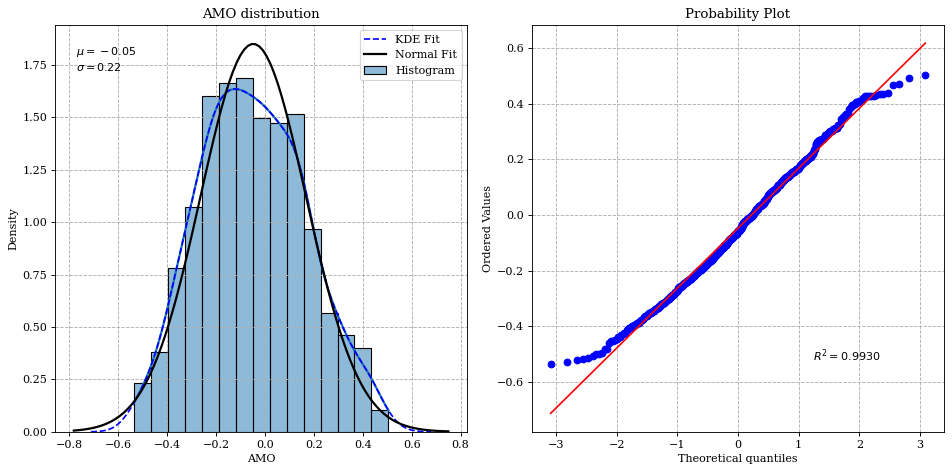

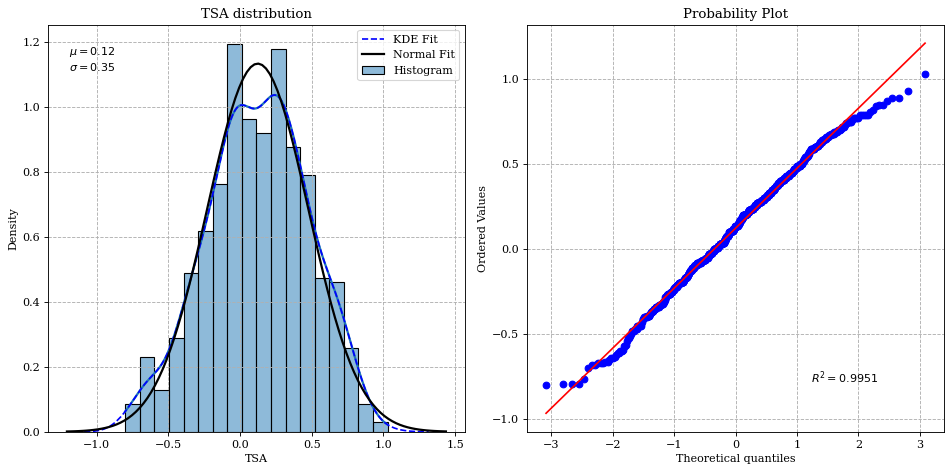

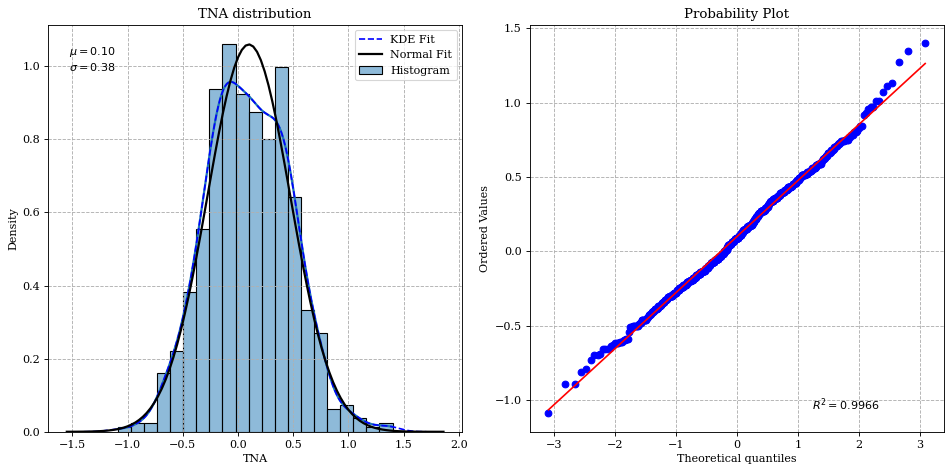

In [10]:
normality_checker = NormalityChecker(df_ind_select)
for ind in df_ind_select.columns:
      normality_checker.check_normality(f'{ind}', dir=output_dir)
    

In [11]:
df_tavg.isnull().sum()

Year            0
Month           0
Coastal Avg     0
Middle Avg      0
Northern Avg    1
dtype: int64

* Addressing missing values with KNN imputer

In [12]:
from sklearn.impute import KNNImputer

In [13]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
df_filled_data = imputer.fit_transform(df_tavg[['Coastal Avg',	'Middle Avg',	'Northern Avg']])

# Create a DataFrame
df_zones = pd.DataFrame(df_filled_data, columns=['Coastal Avg',	'Middle Avg',	'Northern Avg'])
df_zones.head()

Coastal Avg  Middle Avg  Northern Avg
0    27.166129   26.135081     27.633468
1    27.857241   28.429310     29.658190
2    27.655161   27.940323     30.502419
3    27.197667   27.069583     30.161250
4    27.078065   27.278226     29.172581

In [14]:
df_zones.isnull().sum()

Coastal Avg     0
Middle Avg      0
Northern Avg    0
dtype: int64

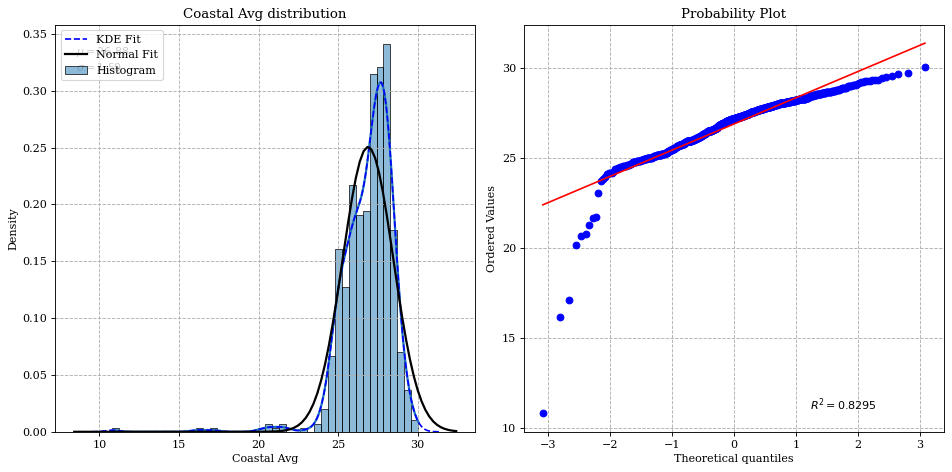

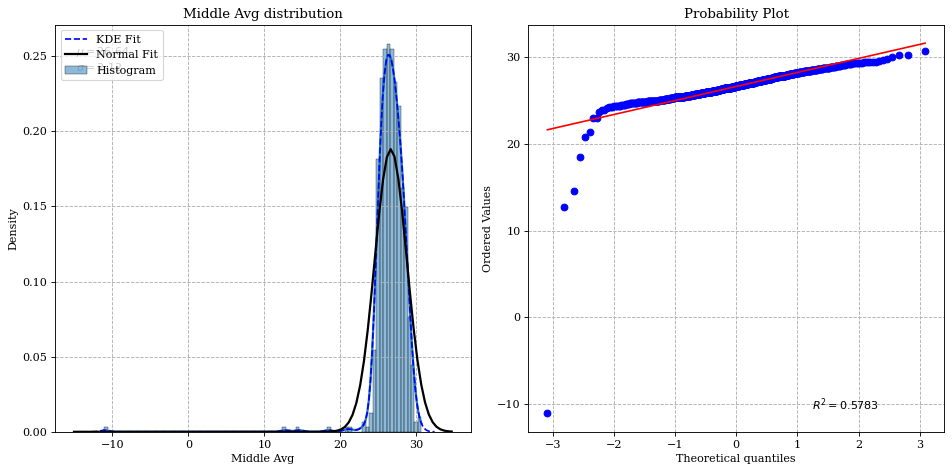

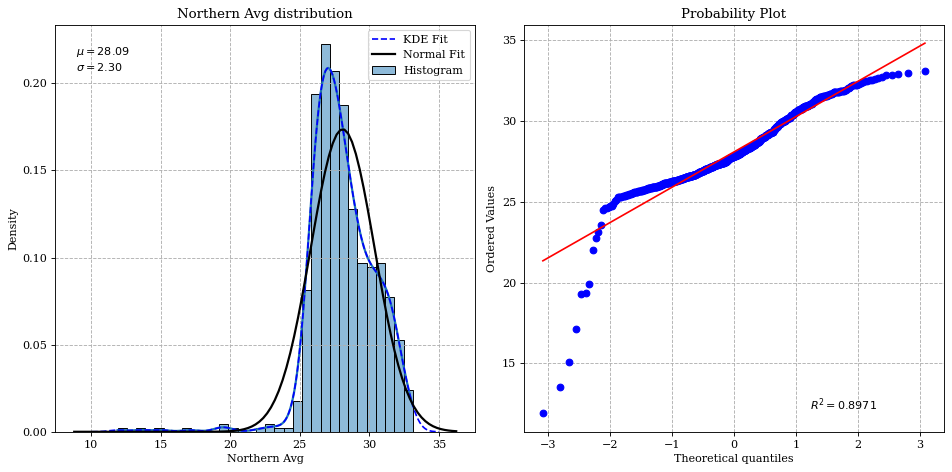

In [15]:
normality_checker = NormalityChecker(df_zones)
for ind in df_zones.columns:
      normality_checker.check_normality(f'{ind}', dir=output_dir)

In [18]:
# normality_checker = NormalityChecker(df_zones)
# for ind in df_zones.columns:
#       normality_checker.check_normality(f'{ind}', dir=output_dir)

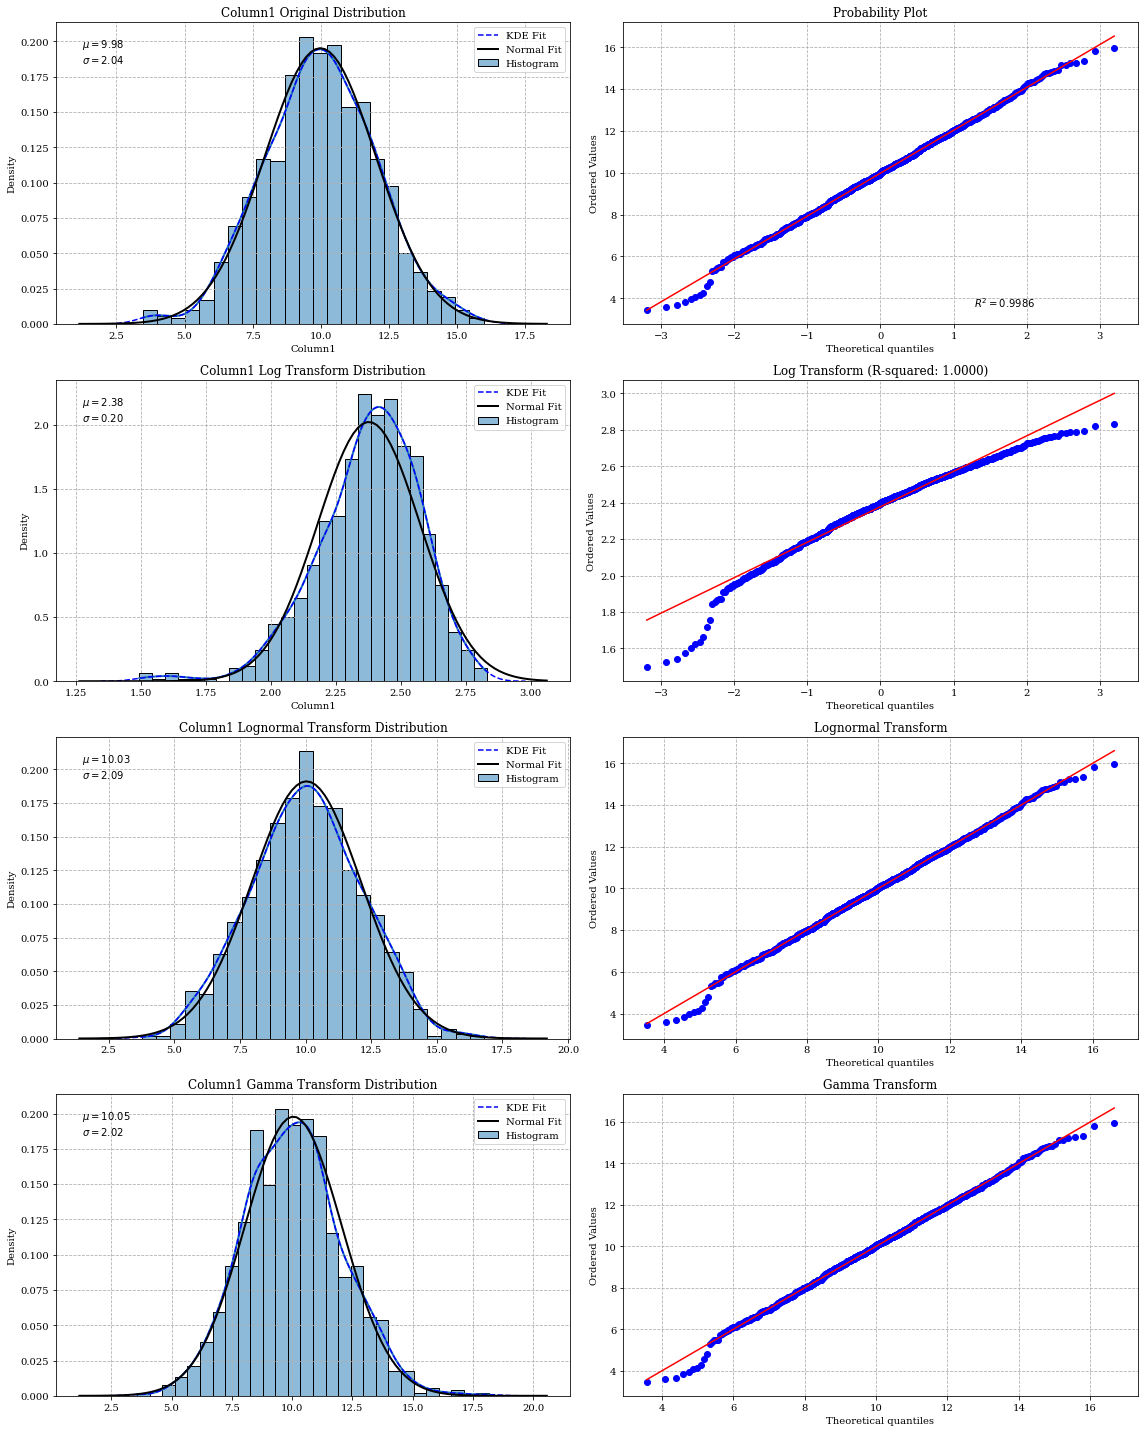

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot, lognorm, gamma
from sklearn.metrics import r2_score
from statsmodels.regression.quantile_regression import QuantReg

class NormalityChecker:
    def __init__(self, df):
        self.df = df

    def _plot_distribution(self, ax, data, title, log_transform=False):        
        if log_transform:
            # Check for negative values and add a constant
            min_val = np.min(data)
            if min_val <= 0:
                data = data - min_val + 1  # Add a constant to make all values positive
            data = np.log1p(data)

        sns.histplot(data,
                     kde=True,
                     stat='density',
                     line_kws={'linewidth': 2, 'color': 'darkgreen'},
                     ax=ax,
                     label='Histogram')
        sns.kdeplot(data, color='blue', ax=ax, linestyle='--', label='KDE Fit')
        xmin, xmax = ax.get_xlim()
        x_values = np.linspace(xmin, xmax, 100)
        p_values = norm.pdf(x_values, np.mean(data), np.std(data))
        ax.plot(x_values, p_values, 'k-', linewidth=2, label='Normal Fit')
        ax.grid(True, linestyle='--')
        ax.legend()

        (mu, sigma) = norm.fit(data)
        ax.text(0.05, 0.95, f'$\mu={mu:.2f}$\n$\sigma={sigma:.2f}$',
                transform=ax.transAxes, fontsize=10,
                verticalalignment='top')
        ax.set_title(title)

    def _qq_plot(self, ax, data):        
        probplot(data, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')

    def _calc_r_squared(self, y_true, y_pred):
        return r2_score(y_true, y_pred)

    def _plot_pp_plot(self, ax, data, dist, title):
        probplot(data, dist=dist, plot=ax)
        ax.grid(True, linestyle='--')
        ax.set_title(title)

    def check_normality(self, cname, dir='.'):
        fig, axs = plt.subplots(4, 2, figsize=(16, 20))

        # Original data
        self._plot_distribution(axs[0, 0], self.df[cname], f'{cname} Original Distribution')
        self._qq_plot(axs[0, 1], self.df[cname])

        # Log Transformation
        log_transformed_data = np.log1p(self.df[cname])
        log_r_squared = self._calc_r_squared(self.df[cname], np.expm1(log_transformed_data))
        self._plot_distribution(axs[1, 0], log_transformed_data, f'{cname} Log Transform Distribution')
        self._plot_pp_plot(axs[1, 1], log_transformed_data, dist='norm', title=f'Log Transform (R-squared: {log_r_squared:.4f})')
        
        # Lognormal Transformation
        lognormal_params = lognorm.fit(self.df[cname])
        lognormal_dist = lognorm(*lognormal_params)
        lognormal_pp = self._plot_pp_plot(axs[2, 1], self.df[cname], dist=lognormal_dist, title='Lognormal Transform')
        lognormal_transformed_data = lognormal_dist.rvs(size=len(self.df[cname]))
        self._plot_distribution(axs[2, 0], lognormal_transformed_data, f'{cname} Lognormal Transform Distribution')
        
        # Gamma Transformation
        gamma_params = gamma.fit(self.df[cname])
        gamma_dist = gamma(*gamma_params)
        gamma_pp = self._plot_pp_plot(axs[3, 1], self.df[cname], dist=gamma_dist, title='Gamma Transform')
        gamma_transformed_data = gamma_dist.rvs(size=len(self.df[cname]))
        self._plot_distribution(axs[3, 0], gamma_transformed_data, f'{cname} Gamma Transform Distribution')

        fig.tight_layout()
        plt.show()

# Example usage:
# Create a DataFrame with your data
data = {
    'Column1': np.random.normal(loc=10, scale=2, size=1000),
    'Column2': np.random.uniform(low=0, high=10, size=1000),
    # Add more columns as needed
}
df = pd.DataFrame(data)

# Initialize NormalityChecker object with your DataFrame
checker = NormalityChecker(df)

# Check normality for a specific column
checker.check_normality('Column1')


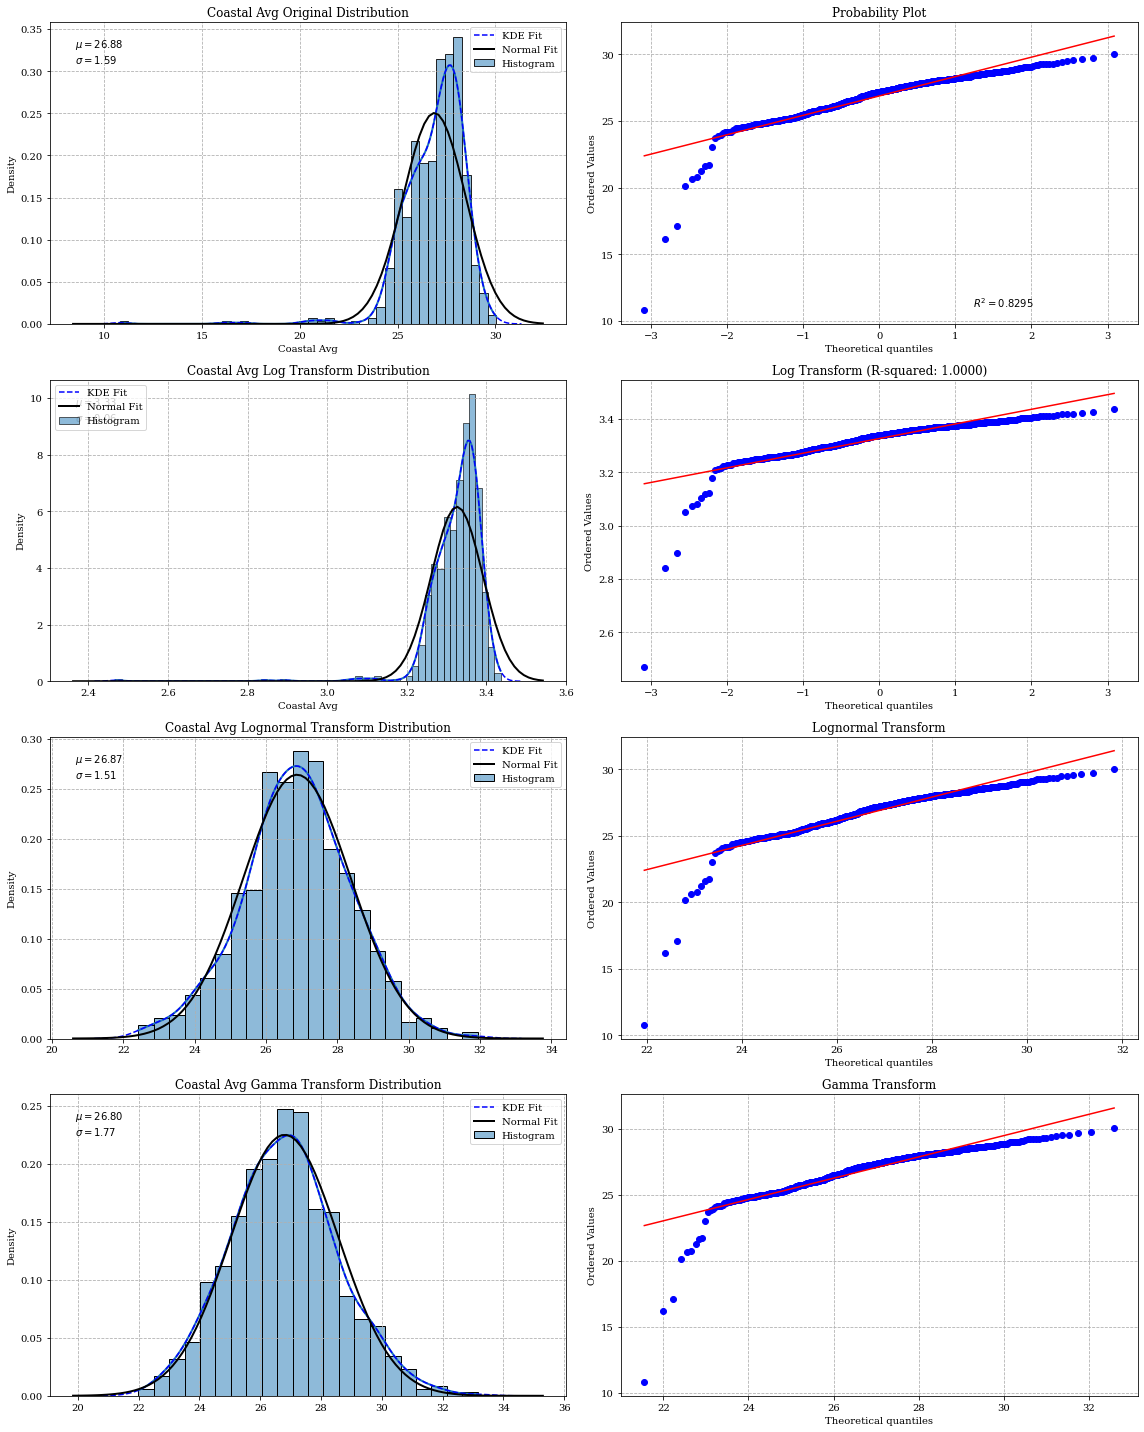

/Users/admin/env/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

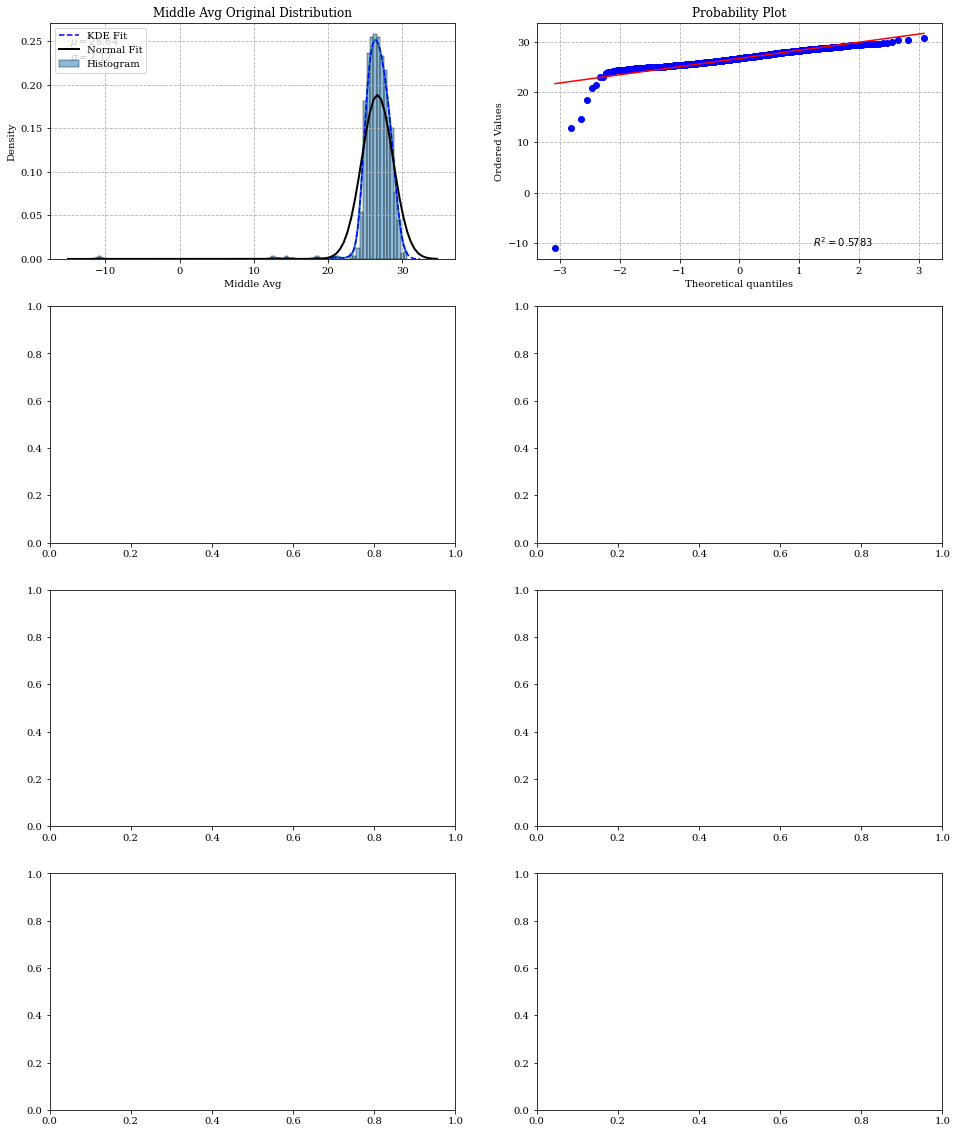

In [24]:
# Initialize NormalityChecker object with your DataFrame
checker = NormalityChecker(df_zones)

# Check normality for a specific column
for ind in df_zones.columns:
    #       normality_checker.check_normality(f'{ind}', dir=output_dir)
    checker.check_normality(f'{ind}')


In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot, lognorm, gamma
from sklearn.metrics import r2_score
from statsmodels.regression.quantile_regression import QuantReg

class NormalityChecker:
    def __init__(self, df):
        self.df = df

    def _plot_distribution(self, ax, data, title, log_transform=False):        
        if log_transform:
            # Check for negative values and add a constant
            min_val = np.min(data)
            if min_val <= 0:
                data = data - min_val + 1  # Add a constant to make all values positive
            data = np.log1p(data)

        sns.histplot(data,
                     kde=True,
                     stat='density',
                     line_kws={'linewidth': 2, 'color': 'darkgreen'},
                     ax=ax,
                     label='Histogram')
        sns.kdeplot(data, color='blue', ax=ax, linestyle='--', label='KDE Fit')
        xmin, xmax = ax.get_xlim()
        x_values = np.linspace(xmin, xmax, 100)
        p_values = norm.pdf(x_values, np.mean(data), np.std(data))
        ax.plot(x_values, p_values, 'k-', linewidth=2, label='Normal Fit')
        ax.grid(True, linestyle='--')
        ax.legend(loc=1)

        (mu, sigma) = norm.fit(data)
        ax.text(0.05, 0.95, f'$\mu={mu:.2f}$\n$\sigma={sigma:.2f}$',
                transform=ax.transAxes, fontsize=10,
                verticalalignment='top')
        ax.set_title(title)

    def _qq_plot(self, ax, data):        
        probplot(data, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')

    def _calc_r_squared(self, y_true, y_pred):
        return r2_score(y_true, y_pred)

    def _plot_pp_plot(self, ax, data, dist, title):
        probplot(data, dist=dist, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')
        ax.set_title(title)

    def check_normality(self, cname, dir='.'):
        fig, axs = plt.subplots(4, 2, figsize=(16, 20))

        # Original data
        self._plot_distribution(axs[0, 0], self.df[cname], f'{cname} Original Distribution')
        self._qq_plot(axs[0, 1], self.df[cname])

        # Log Transformation
        log_transformed_data = self.df[cname].copy()
        if np.any(log_transformed_data <= 0):
            min_val = np.min(log_transformed_data)
            log_transformed_data = log_transformed_data - min_val + 1
        log_transformed_data = np.log1p(log_transformed_data)
        log_r_squared = self._calc_r_squared(self.df[cname], np.expm1(log_transformed_data))
        self._plot_distribution(axs[1, 0], log_transformed_data, f'{cname} Log Transform Distribution')
        self._plot_pp_plot(axs[1, 1], log_transformed_data, dist='norm', title=f'Log Transform (R-squared: {log_r_squared:.4f})')
        
        # Lognormal Transformation
        lognormal_params = lognorm.fit(self.df[cname])
        lognormal_dist = lognorm(*lognormal_params)
        lognormal_pp = self._plot_pp_plot(axs[2, 1], self.df[cname], dist=lognormal_dist, title='Lognormal Transform')
        lognormal_transformed_data = lognormal_dist.rvs(size=len(self.df[cname]))
        self._plot_distribution(axs[2, 0], lognormal_transformed_data, f'{cname} Lognormal Transform Distribution')
        
        # Gamma Transformation
        gamma_params = gamma.fit(self.df[cname])
        gamma_dist = gamma(*gamma_params)
        gamma_pp = self._plot_pp_plot(axs[3, 1], self.df[cname], dist=gamma_dist, title='Gamma Transform')
        gamma_transformed_data = gamma_dist.rvs(size=len(self.df[cname]))
        self._plot_distribution(axs[3, 0], gamma_transformed_data, f'{cname} Gamma Transform Distribution')

        fig.tight_layout()
        plt.show()

# # Example usage:
# # Create a DataFrame with your data
# data = {
#     'Column1': np.random.normal(loc=10, scale=2, size=1000),
#     'Column2': np.random.uniform(low=0, high=10, size=1000),
#     # Add more columns as needed
# }
# df = pd.DataFrame(data)

# # Initialize NormalityChecker object with your DataFrame
# checker = NormalityChecker(df)

# # Check normality for a specific column
# checker.check_normality('Column1')


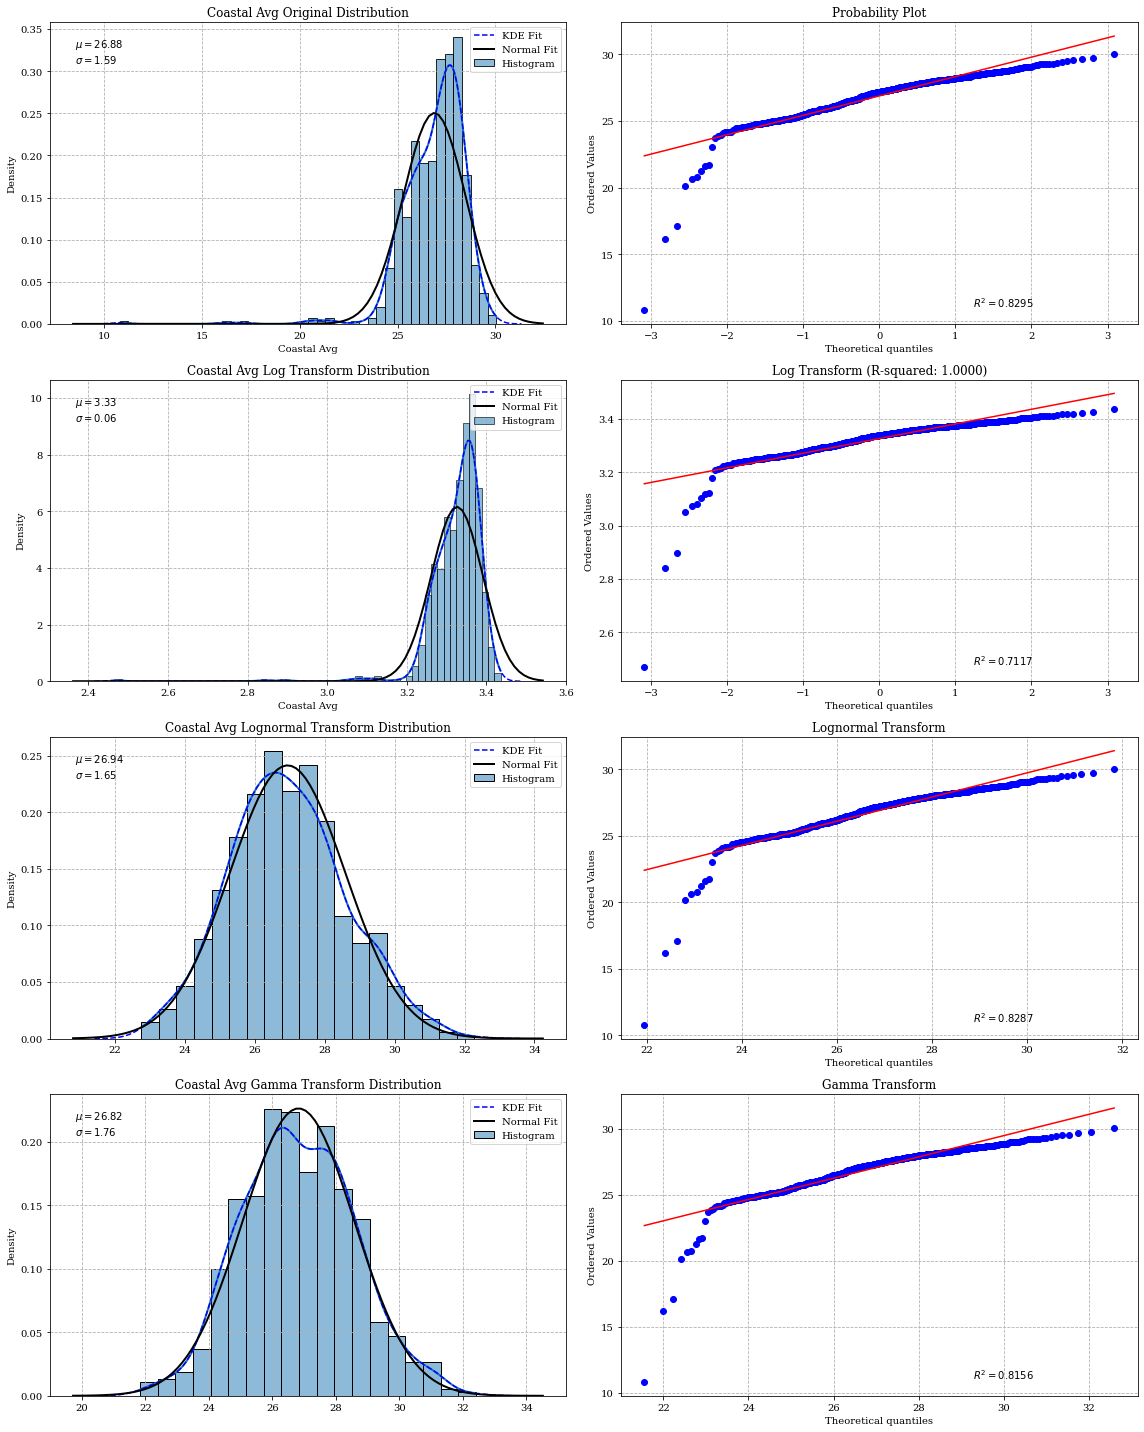

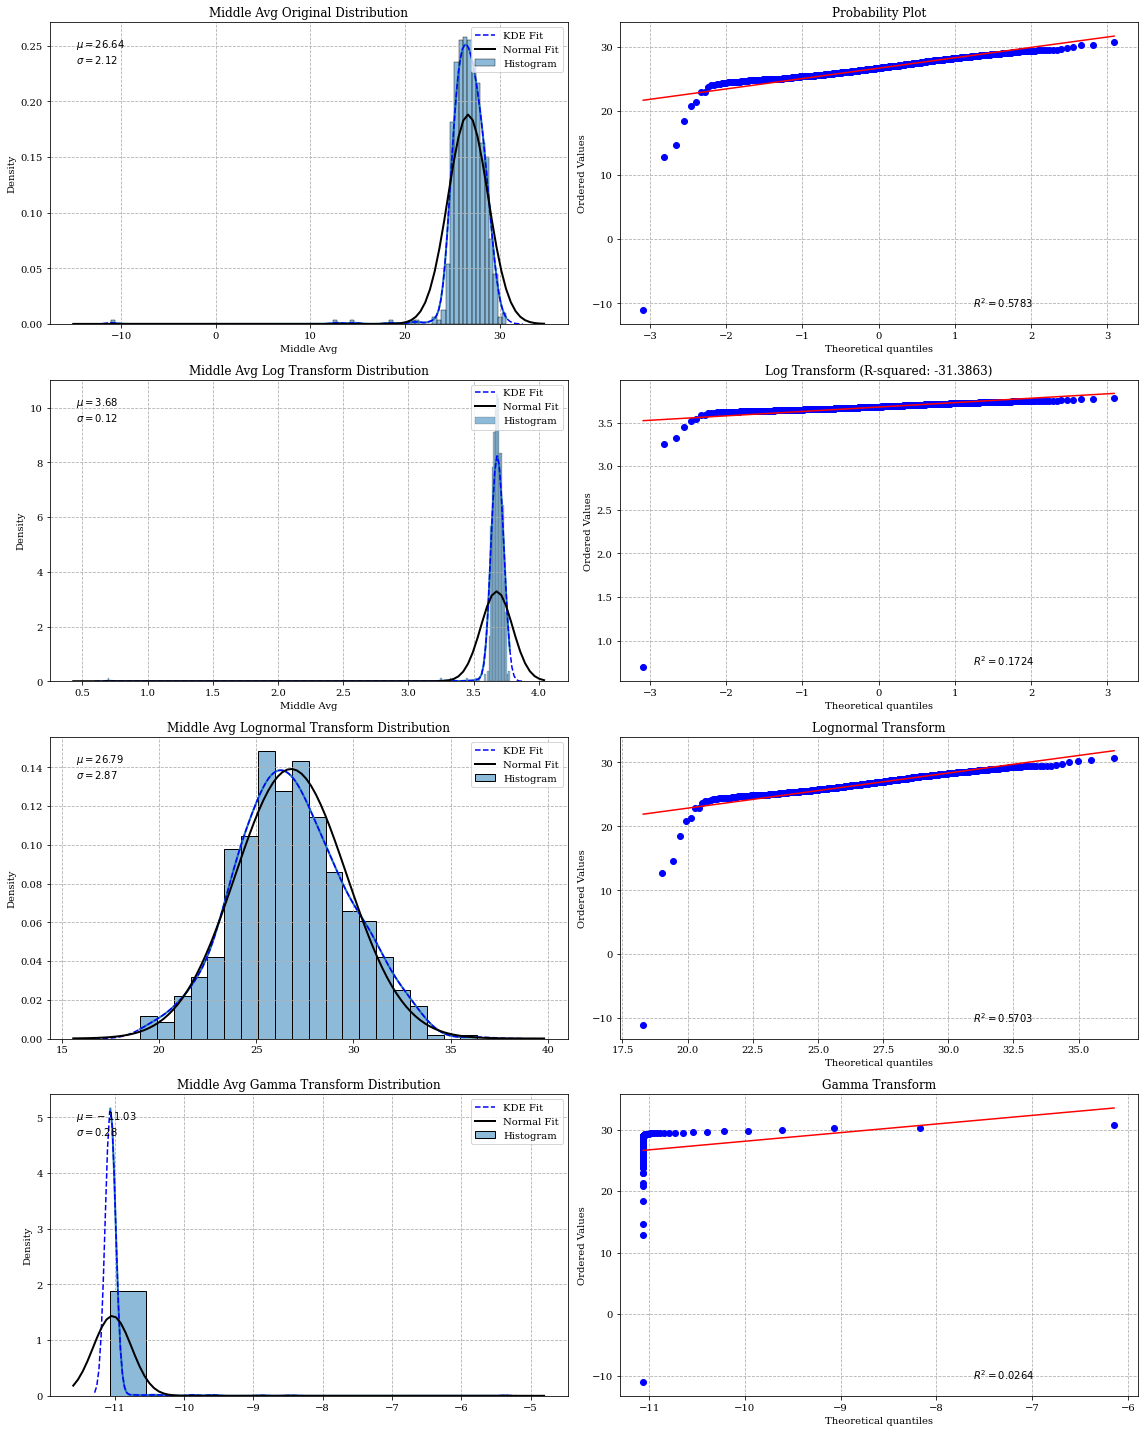

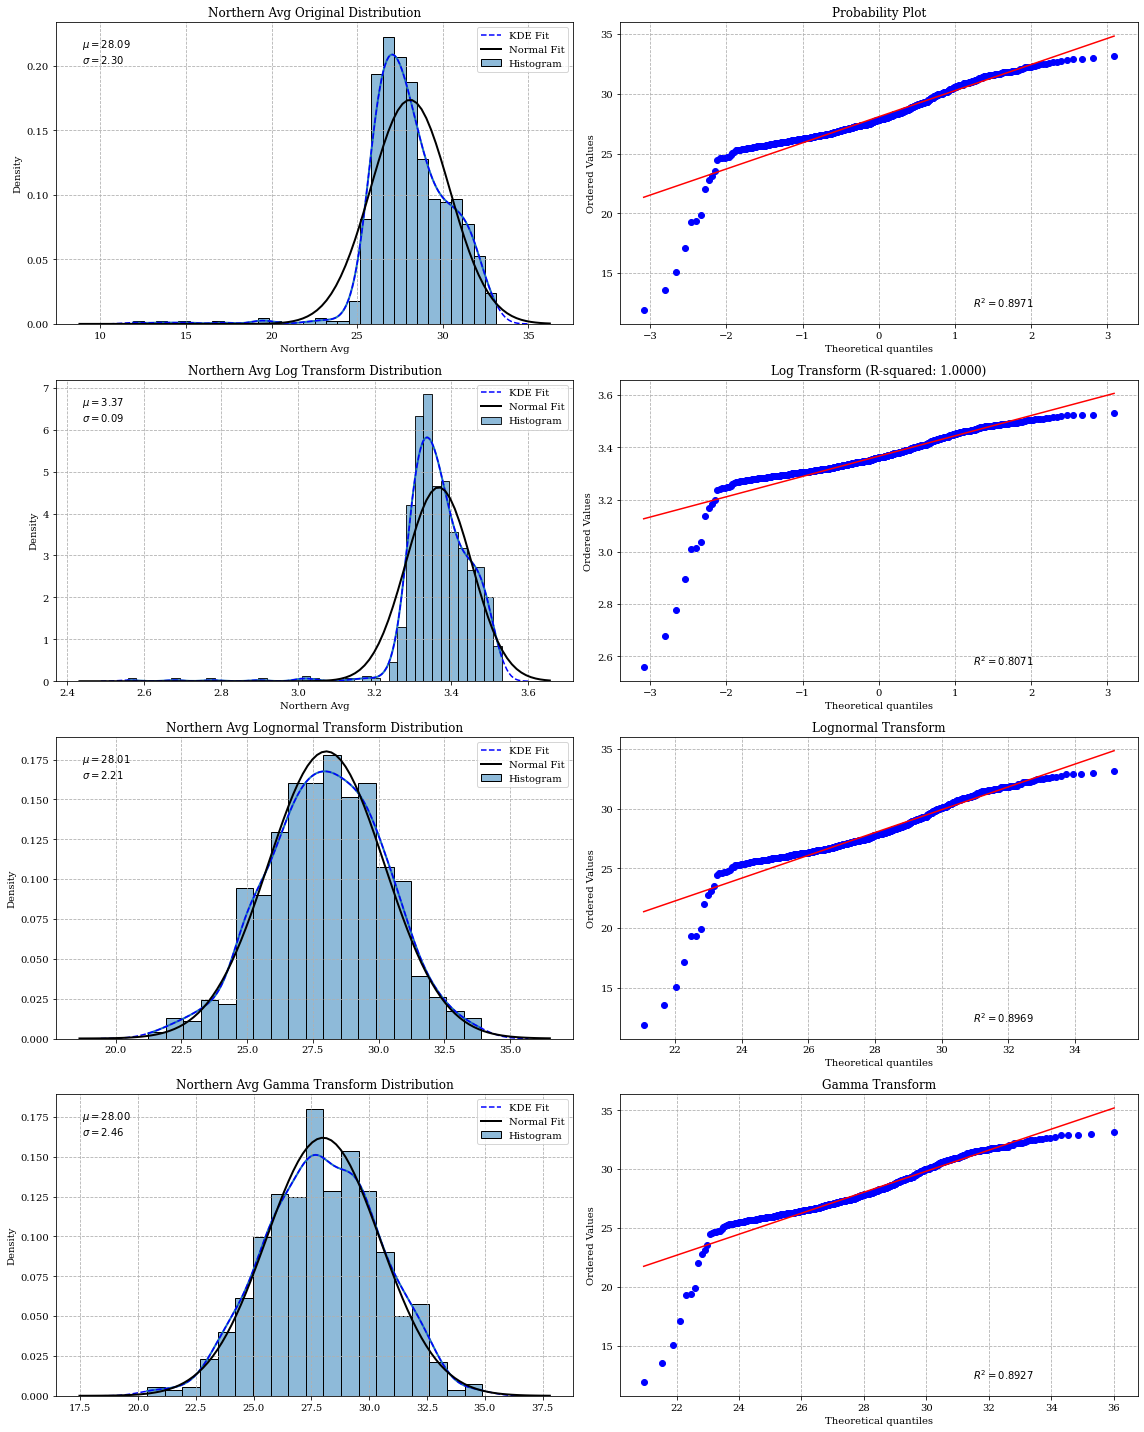

In [39]:
# Initialize NormalityChecker object with your DataFrame
checker = NormalityChecker(df_zones)

# Check normality for a specific column
for ind in df_zones.columns:
    #       normality_checker.check_normality(f'{ind}', dir=output_dir)
    checker.check_normality(f'{ind}')


In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot, lognorm, gamma
from sklearn.metrics import r2_score
from statsmodels.regression.quantile_regression import QuantReg

class NormalityChecker:
    def __init__(self, df):
        self.df = df

    def _plot_distribution(self, ax, data, title, log_transform=False):        
        if log_transform:
            # Check for negative values and add a constant
            min_val = np.min(data)
            if min_val <= 0:
                data = data - min_val + 1  # Add a constant to make all values positive
            data = np.log1p(data)

        sns.histplot(data,
                     kde=True,
                     stat='density',
                     line_kws={'linewidth': 2, 'color': 'darkgreen'},
                     ax=ax,
                     label='Histogram')
        sns.kdeplot(data, color='blue', ax=ax, linestyle='--', label='KDE Fit')
        xmin, xmax = ax.get_xlim()
        x_values = np.linspace(xmin, xmax, 100)
        p_values = norm.pdf(x_values, np.mean(data), np.std(data))
        ax.plot(x_values, p_values, 'k-', linewidth=2, label='Normal Fit')
        ax.grid(True, linestyle='--')
        ax.legend(loc=1)

        (mu, sigma) = norm.fit(data)
        ax.text(0.05, 0.95, f'$\mu={mu:.2f}$\n$\sigma={sigma:.2f}$',
                transform=ax.transAxes, fontsize=10,
                verticalalignment='top')
        ax.set_title(title)
        ax.tick_params(axis='both', which='major', labelsize=14)

    def _qq_plot(self, ax, data):        
        probplot(data, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')
        ax.tick_params(axis='both', which='major', labelsize=14)

    def _calc_r_squared(self, y_true, y_pred):
        return r2_score(y_true, y_pred)

    def _plot_pp_plot(self, ax, data, dist, title):
        probplot(data, dist=dist, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')
        ax.set_title(title)
        ax.tick_params(axis='both', which='major', labelsize=14)

    def check_normality(self, cname, dir='.'):
        fig, axs = plt.subplots(5, 2, figsize=(16, 25))

        # Original data
        self._plot_distribution(axs[0, 0], self.df[cname], f'{cname} Original Distribution')
        self._qq_plot(axs[0, 1], self.df[cname])

        # Log Transformation
        log_transformed_data = self.df[cname].copy()
        if np.any(log_transformed_data <= 0):
            min_val = np.min(log_transformed_data)
            log_transformed_data = log_transformed_data - min_val + 1
        log_transformed_data = np.log1p(log_transformed_data)
        log_r_squared = self._calc_r_squared(self.df[cname], np.expm1(log_transformed_data))
        self._plot_distribution(axs[1, 0], log_transformed_data, f'{cname} Log Transform Distribution')
        self._plot_pp_plot(axs[1, 1], log_transformed_data, dist='norm', title=f'Log Transform (R-squared: {log_r_squared:.4f})')
        
        # Lognormal Transformation
        lognormal_params = lognorm.fit(self.df[cname])
        lognormal_dist = lognorm(*lognormal_params)
        lognormal_pp = self._plot_pp_plot(axs[2, 1], self.df[cname], dist=lognormal_dist, title='Lognormal Transform')
        lognormal_transformed_data = lognormal_dist.rvs(size=len(self.df[cname]))
        self._plot_distribution(axs[2, 0], lognormal_transformed_data, f'{cname} Lognormal Transform Distribution')
        
        # Gamma Transformation
        gamma_params = gamma.fit(self.df[cname])
        gamma_dist = gamma(*gamma_params)
        gamma_pp = self._plot_pp_plot(axs[3, 1], self.df[cname], dist=gamma_dist, title='Gamma Transform')
        gamma_transformed_data = gamma_dist.rvs(size=len(self.df[cname]))
        self._plot_distribution(axs[3, 0], gamma_transformed_data, f'{cname} Gamma Transform Distribution')
        
        # Quantile Regression Transformation
        qr = QuantReg(self.df[cname], self.df.index)
        quantile = 0.5  # Change this to desired quantile
        qr_transformed_data = qr.fit(q=quantile).predict()
        self._plot_pp_plot(axs[4, 1], qr_transformed_data, dist='norm', title='Quantile Regression Transform')
#         self._plot_pp_plot(axs[4, 1], self.df[cname], dist=qr_transformed_data, title='Quantile Regression Transform')
        self._plot_distribution(axs[4, 0], qr_transformed_data, f'{cname} Quantile Regression Transform Distribution')

        fig.tight_layout()
        plt.show()

        # Storing transformed data into a dictionary
        transformed_data_dict = {
            'Log Transform': log_transformed_data,
            'Lognormal Transform': lognormal_transformed_data,
            'Gamma Transform': gamma_transformed_data,
            'Quantile Regression Transform': qr_transformed_data
        }
        return transformed_data_dict

# # Example usage:
# # Create a DataFrame with your data
# data = {
#     'Column1': np.random.normal(loc=10, scale=2, size=1000),
#     'Column2': np.random.uniform(low=0, high=10, size=1000),
#     # Add more columns as needed
# }
# df = pd.DataFrame(data)

# # Initialize NormalityChecker object with your DataFrame
# checker = NormalityChecker(df)

# # Check normality for a specific column
# transformed_data = checker.check_normality('Column1')


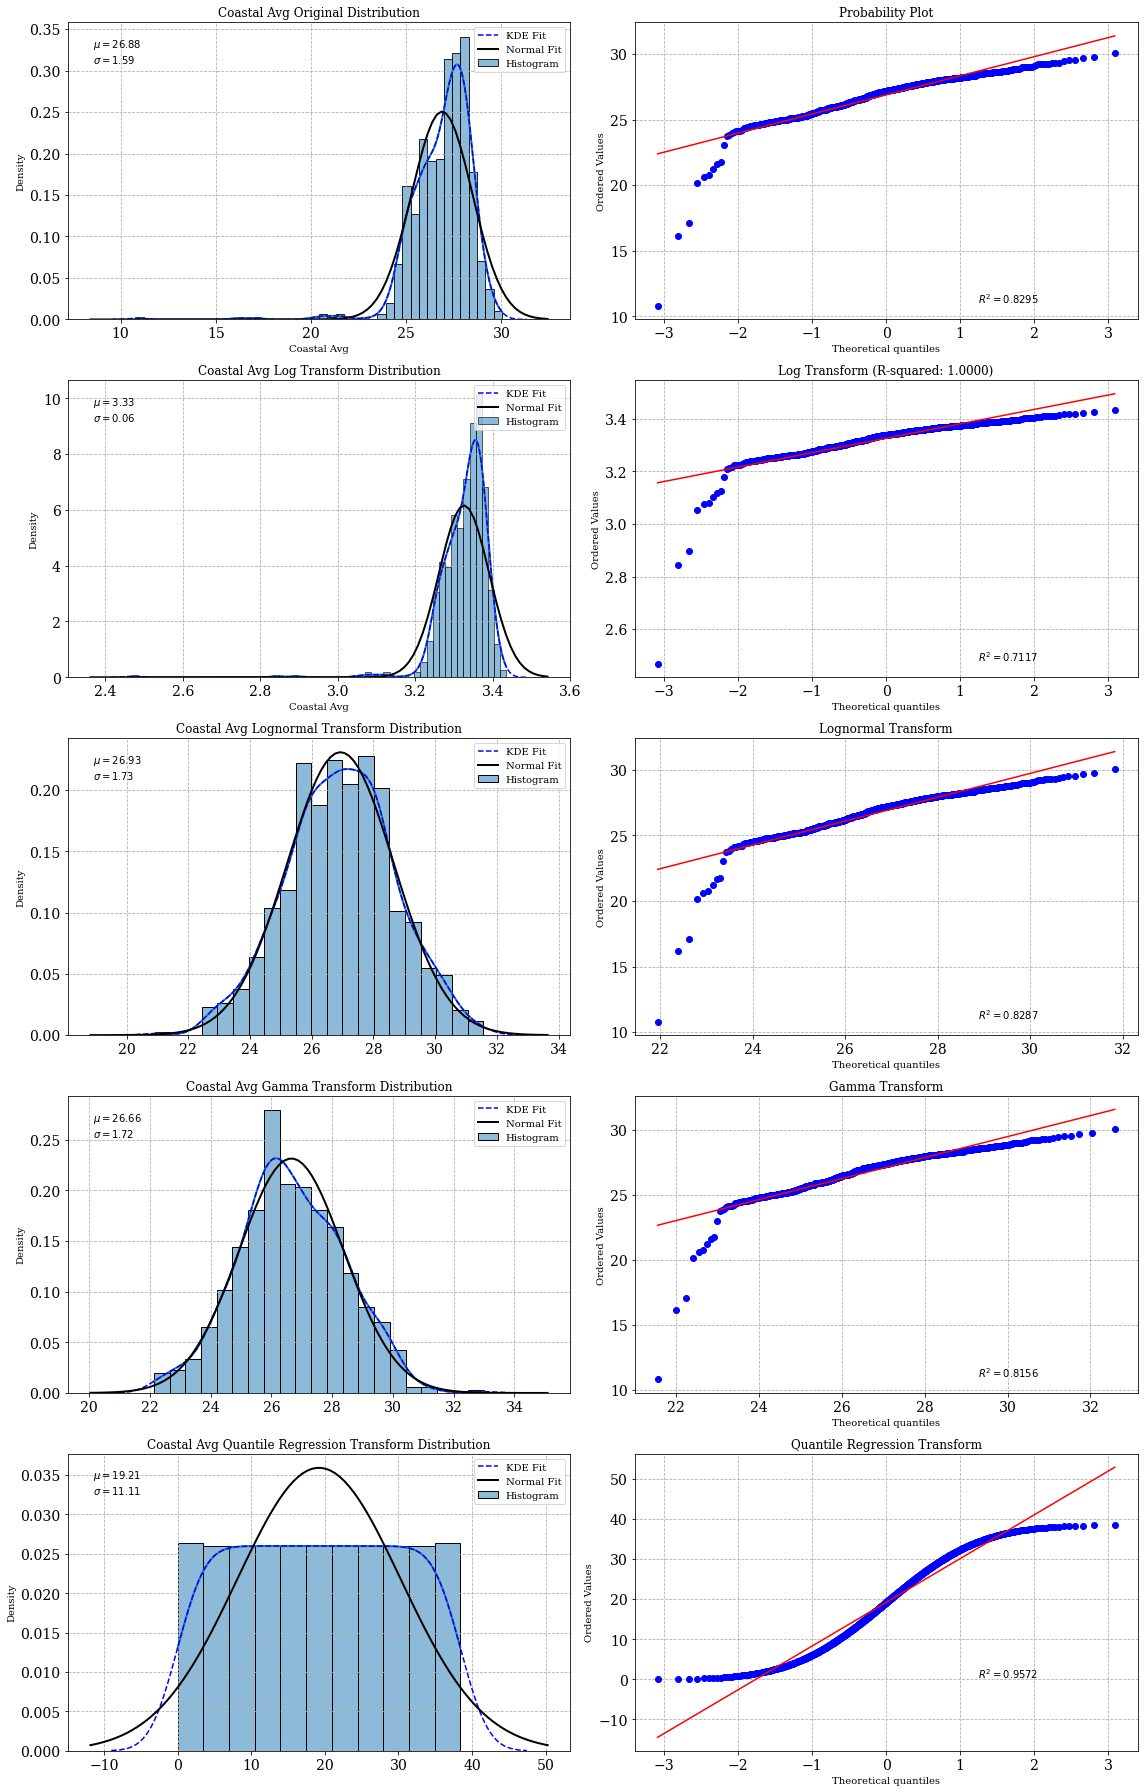

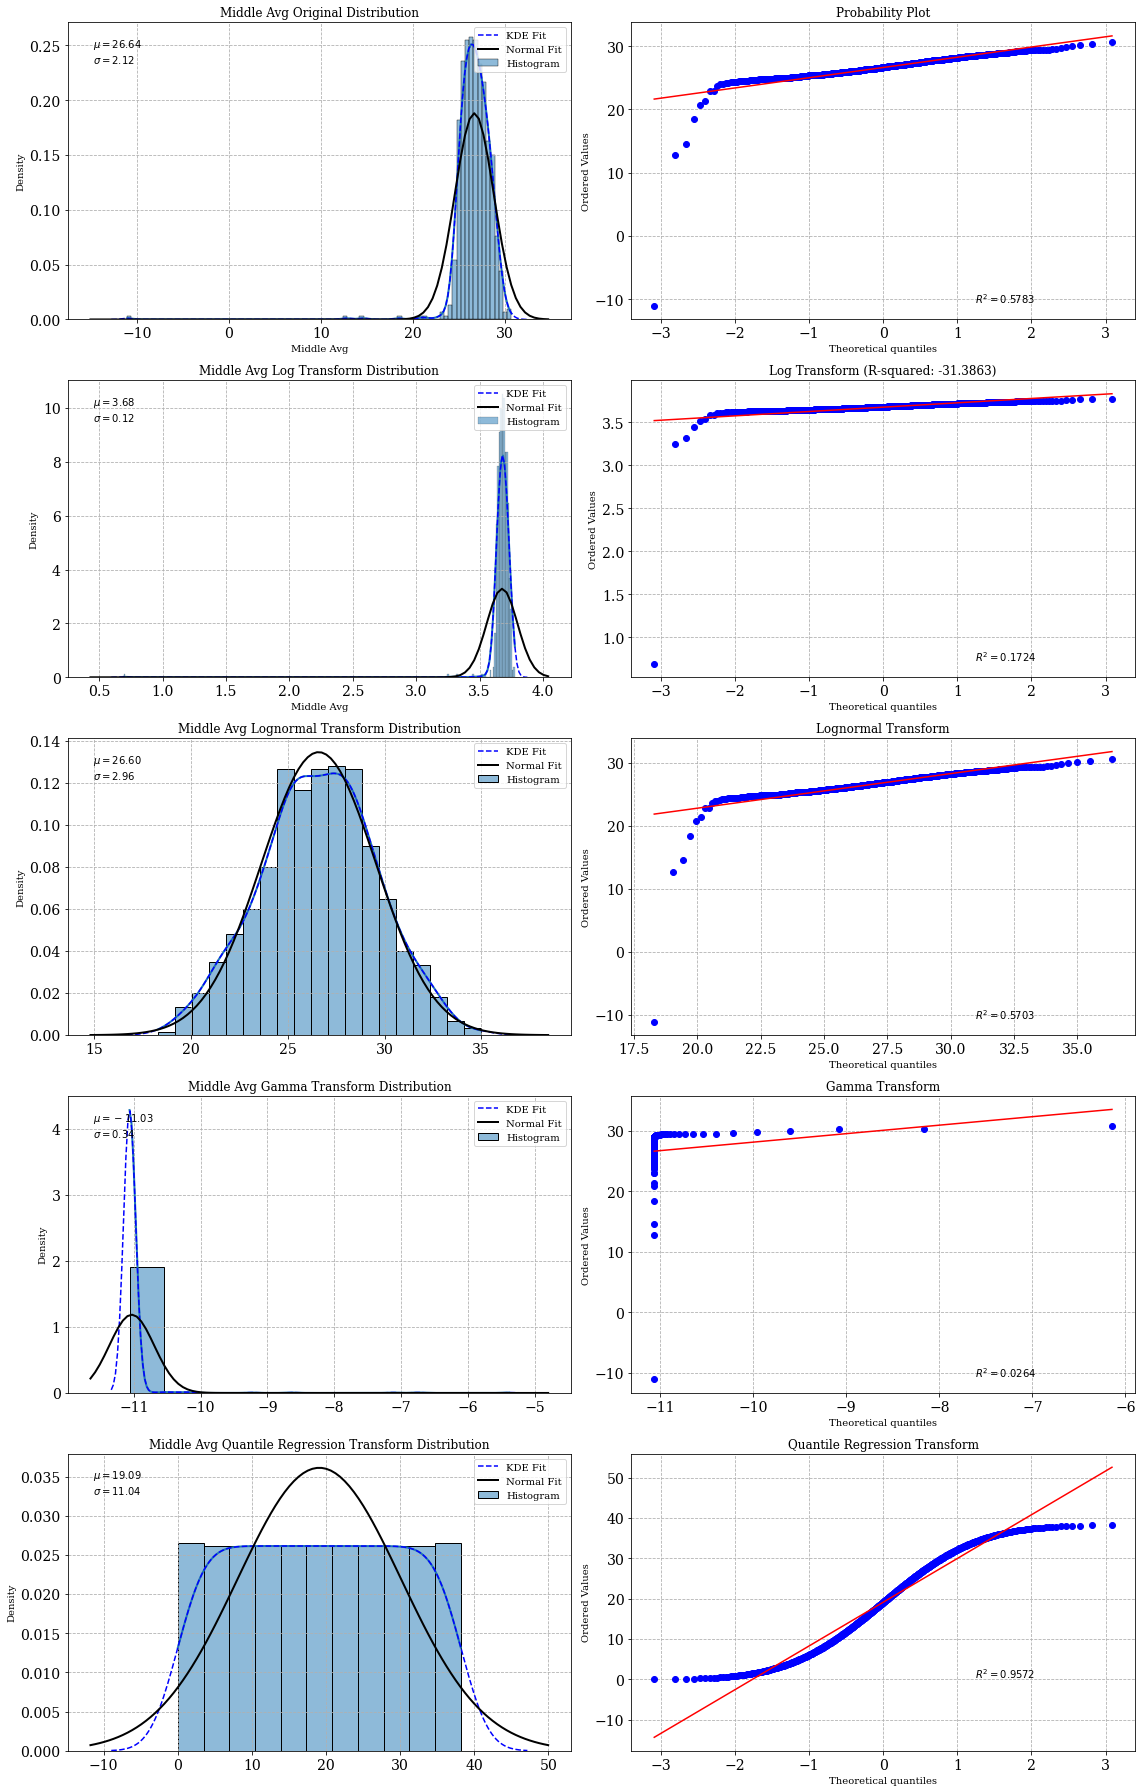

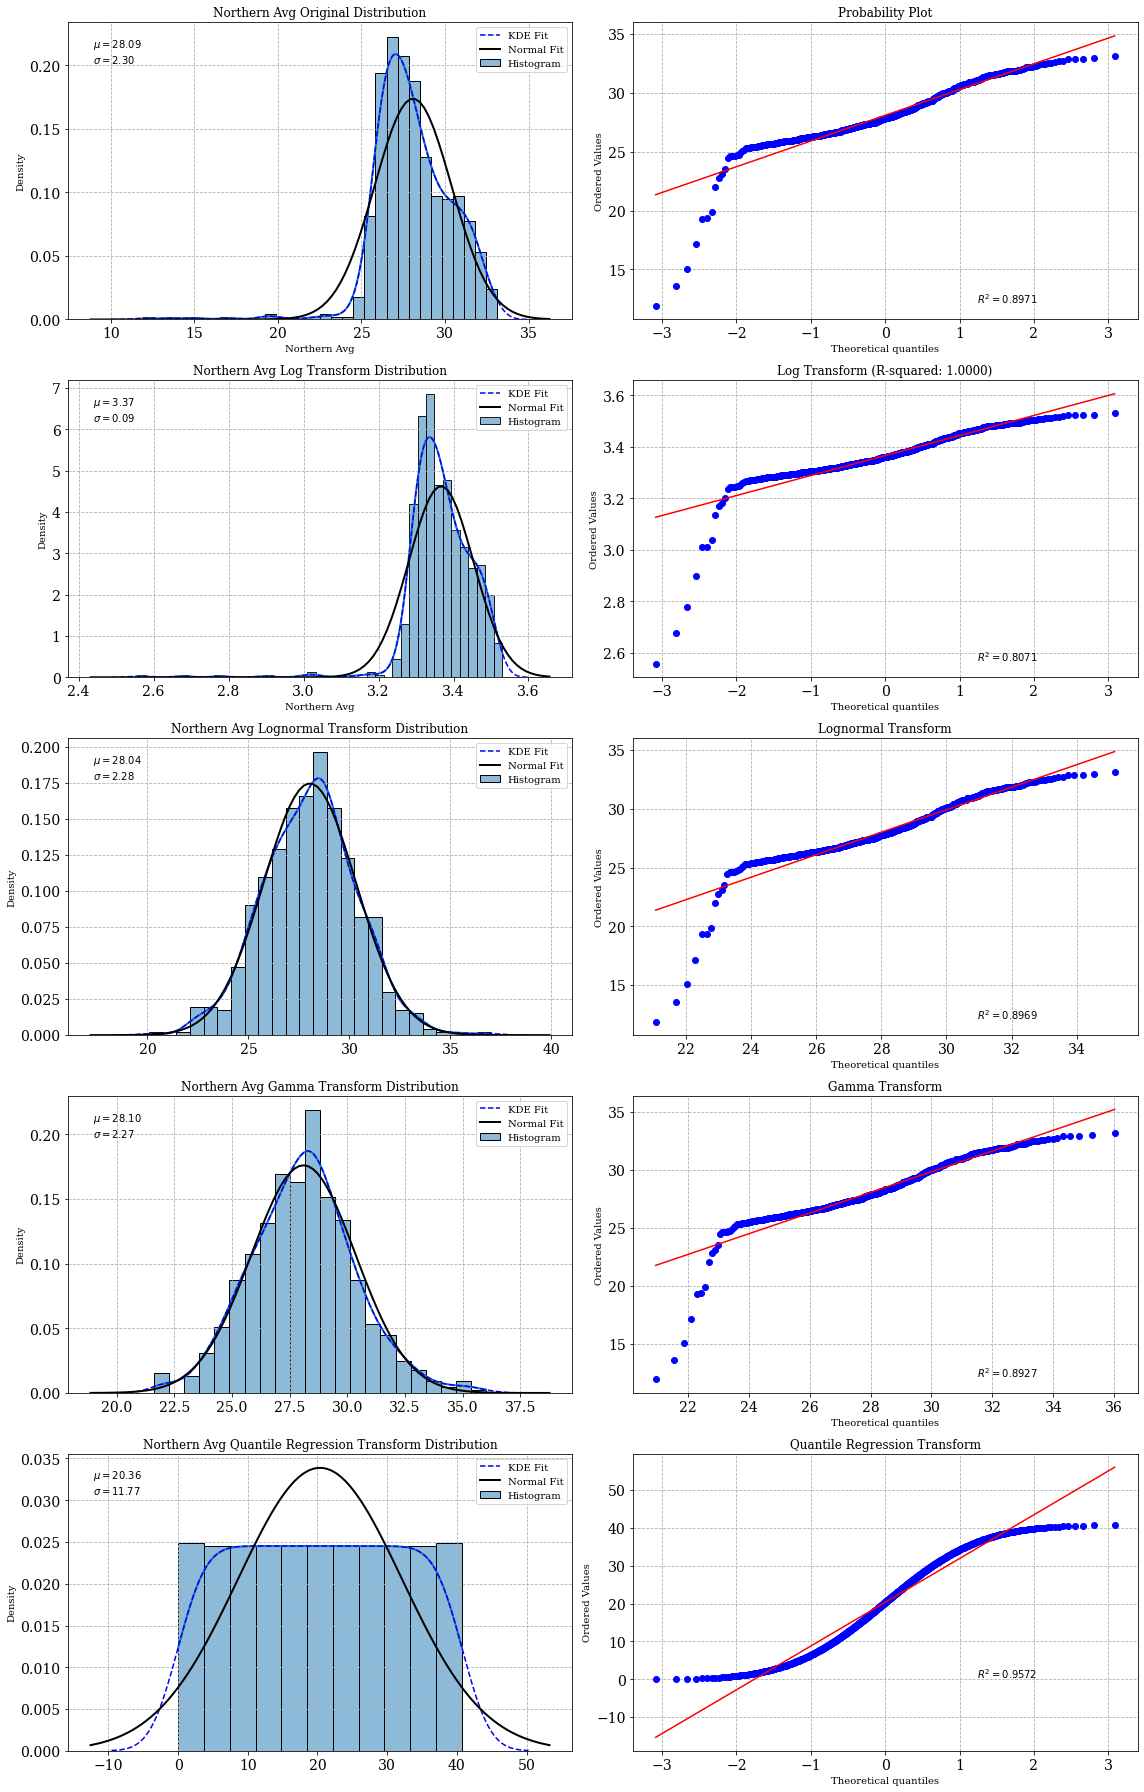

In [47]:
# Initialize NormalityChecker object with your DataFrame
checker = NormalityChecker(df_zones)

transformed_data = {}

# Check normality for a specific column
for ind in df_zones.columns:
    #       normality_checker.check_normality(f'{ind}', dir=output_dir)
    transformed_data[f'{ind}'] = checker.check_normality(f'{ind}')


In [43]:
df_zones.describe()

Coastal Avg  Middle Avg  Northern Avg
count   684.000000  684.000000    684.000000
mean     26.883133   26.640828     28.086815
std       1.593584    2.121313      2.298264
min      10.798065  -11.063333     11.902823
25%      25.986890   25.719160     26.628720
50%      27.170527   26.677133     27.843481
75%      27.948667   27.749728     29.557935
max      30.040968   30.680914     33.132796

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot, lognorm, gamma, beta
from sklearn.metrics import r2_score

class NormalityChecker:
    def __init__(self, df):
        self.df = df

    def _plot_distribution(self, ax, data, title, log_transform=False):        
        if log_transform:
            # Check for negative values and add a constant
            min_val = np.min(data)
            if min_val <= 0:
                data = data - min_val + 1  # Add a constant to make all values positive
            data = np.log1p(data)

        sns.histplot(data,
                     kde=True,
                     stat='density',
                     line_kws={'linewidth': 2, 'color': 'darkgreen'},
                     ax=ax,
                     label='Histogram')
        sns.kdeplot(data, color='blue', ax=ax, linestyle='--', label='KDE Fit')
        xmin, xmax = ax.get_xlim()
        x_values = np.linspace(xmin, xmax, 100)
        p_values = norm.pdf(x_values, np.mean(data), np.std(data))
        ax.plot(x_values, p_values, 'k-', linewidth=2, label='Normal Fit')
        ax.grid(True, linestyle='--')
        ax.legend(loc=1)

        (mu, sigma) = norm.fit(data)
        ax.text(0.05, 0.95, f'$\mu={mu:.2f}$\n$\sigma={sigma:.2f}$',
                transform=ax.transAxes, fontsize=10,
                verticalalignment='top')
        ax.set_title(title)
        ax.tick_params(axis='both', which='major', labelsize=14)

    def _qq_plot(self, ax, data):        
        probplot(data, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')
        ax.tick_params(axis='both', which='major', labelsize=14)

    def _calc_r_squared(self, y_true, y_pred):
        return r2_score(y_true, y_pred)

    def _plot_pp_plot(self, ax, data, dist, title):
        probplot(data, dist=dist, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')
        ax.set_title(title)
        ax.tick_params(axis='both', which='major', labelsize=14)

    def check_normality(self, cname, dir='.'):
        fig, axs = plt.subplots(5, 2, figsize=(16, 25))

        # Original data
        self._plot_distribution(axs[0, 0], self.df[cname], f'{cname} Original Distribution')
        self._qq_plot(axs[0, 1], self.df[cname])

        # Log Transformation
        log_transformed_data = self.df[cname].copy()
        if np.any(log_transformed_data <= 0):
            min_val = np.min(log_transformed_data)
            log_transformed_data = log_transformed_data - min_val + 1
        log_transformed_data = np.log1p(log_transformed_data)
        log_r_squared = self._calc_r_squared(self.df[cname], np.expm1(log_transformed_data))
        self._plot_distribution(axs[1, 0], log_transformed_data, f'{cname} Log Transform Distribution')
        self._plot_pp_plot(axs[1, 1], log_transformed_data, dist='norm', title=f'Log Transform (R-squared: {log_r_squared:.4f})')
        
        # Lognormal Transformation
        lognormal_params = lognorm.fit(self.df[cname])
        lognormal_dist = lognorm(*lognormal_params)
        lognormal_pp = self._plot_pp_plot(axs[2, 1], self.df[cname], dist=lognormal_dist, title='Lognormal Transform')
        lognormal_transformed_data = lognormal_dist.rvs(size=len(self.df[cname]))
        self._plot_distribution(axs[2, 0], lognormal_transformed_data, f'{cname} Lognormal Transform Distribution')
        
        # Gamma Transformation
        gamma_params = gamma.fit(self.df[cname])
        gamma_dist = gamma(*gamma_params)
        gamma_pp = self._plot_pp_plot(axs[3, 1], self.df[cname], dist=gamma_dist, title='Gamma Transform')
        gamma_transformed_data = gamma_dist.rvs(size=len(self.df[cname]))
        self._plot_distribution(axs[3, 0], gamma_transformed_data, f'{cname} Gamma Transform Distribution')
        
        # Beta Distribution Transformation
        beta_params = beta.fit(self.df[cname])
        beta_dist = beta(*beta_params)
        beta_pp = self._plot_pp_plot(axs[4, 1], self.df[cname], dist=beta_dist, title='Beta Transform')
        beta_transformed_data = beta_dist.rvs(size=len(self.df[cname]))
        self._plot_distribution(axs[4, 0], beta_transformed_data, f'{cname} Beta Transform Distribution')

        fig.tight_layout()
        
        # Save the figure in both PDF and PNG formats
        for ext in ['pdf', 'png']:
            plt.savefig(dir + '/' + f'{cname}.{ext}', 
                        bbox_inches='tight',  # Trim the white spaces around the figure
                        pad_inches=0.1,       # Padding between the figure and the edges
                        format=ext,          # Save as the current extension
                        dpi=300 if ext == 'png' else None,  # Set DPI only for PNG format
                        transparent=True
                       )
        plt.show()

        # Storing transformed data into a dictionary
        transformed_data_dict = {
            'Log Transform': log_transformed_data,
            'Lognormal Transform': lognormal_transformed_data,
            'Gamma Transform': gamma_transformed_data,
            'Beta Transform': beta_transformed_data
        }
        return transformed_data_dict

# # Example usage:
# # Create a DataFrame with your data
# data = {
#     'Column1': np.random.normal(loc=10, scale=2, size=1000),
#     'Column2': np.random.uniform(low=0, high=10, size=1000),
#     # Add more columns as needed
# }
# df = pd.DataFrame(data)

# # Initialize NormalityChecker object with your DataFrame
# checker = NormalityChecker(df)

# # Check normality for a specific column
# transformed_data = checker.check_normality('Column1')


/Users/admin/env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/admin/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


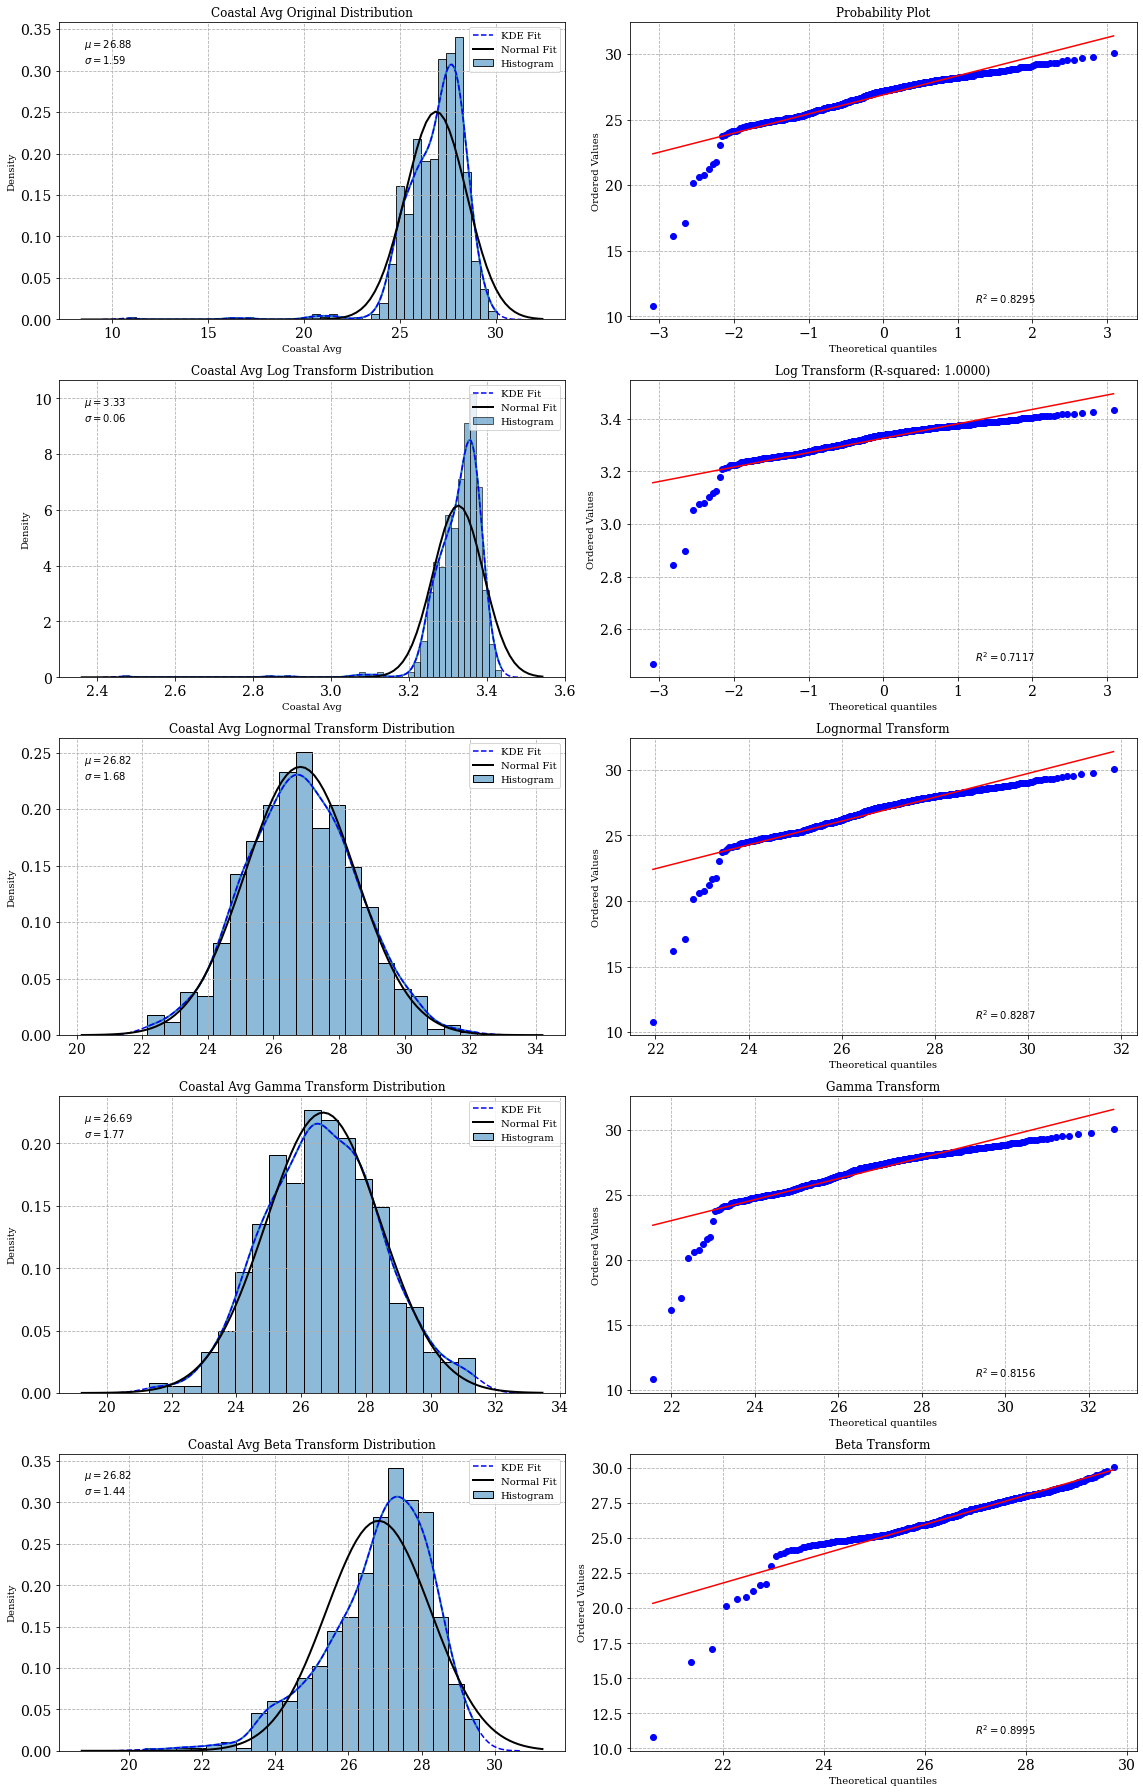

/Users/admin/env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/admin/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


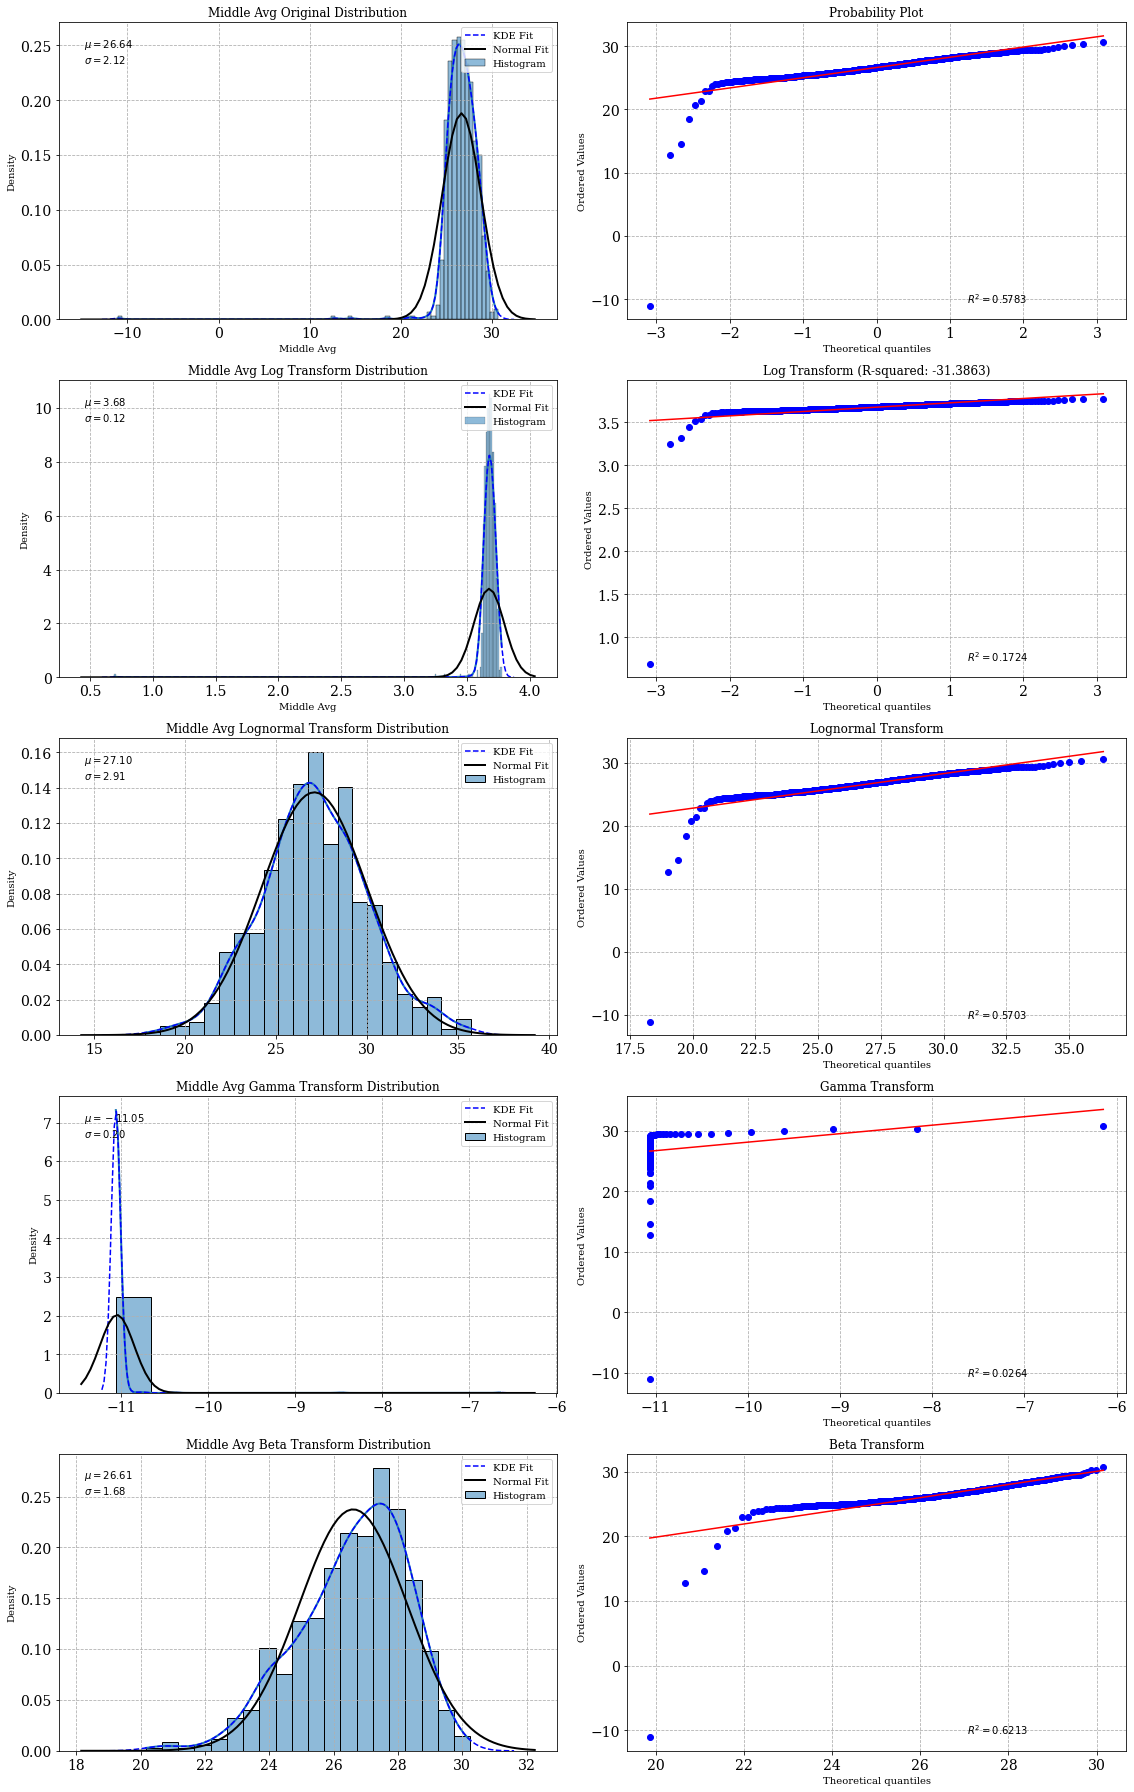

/Users/admin/env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/admin/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


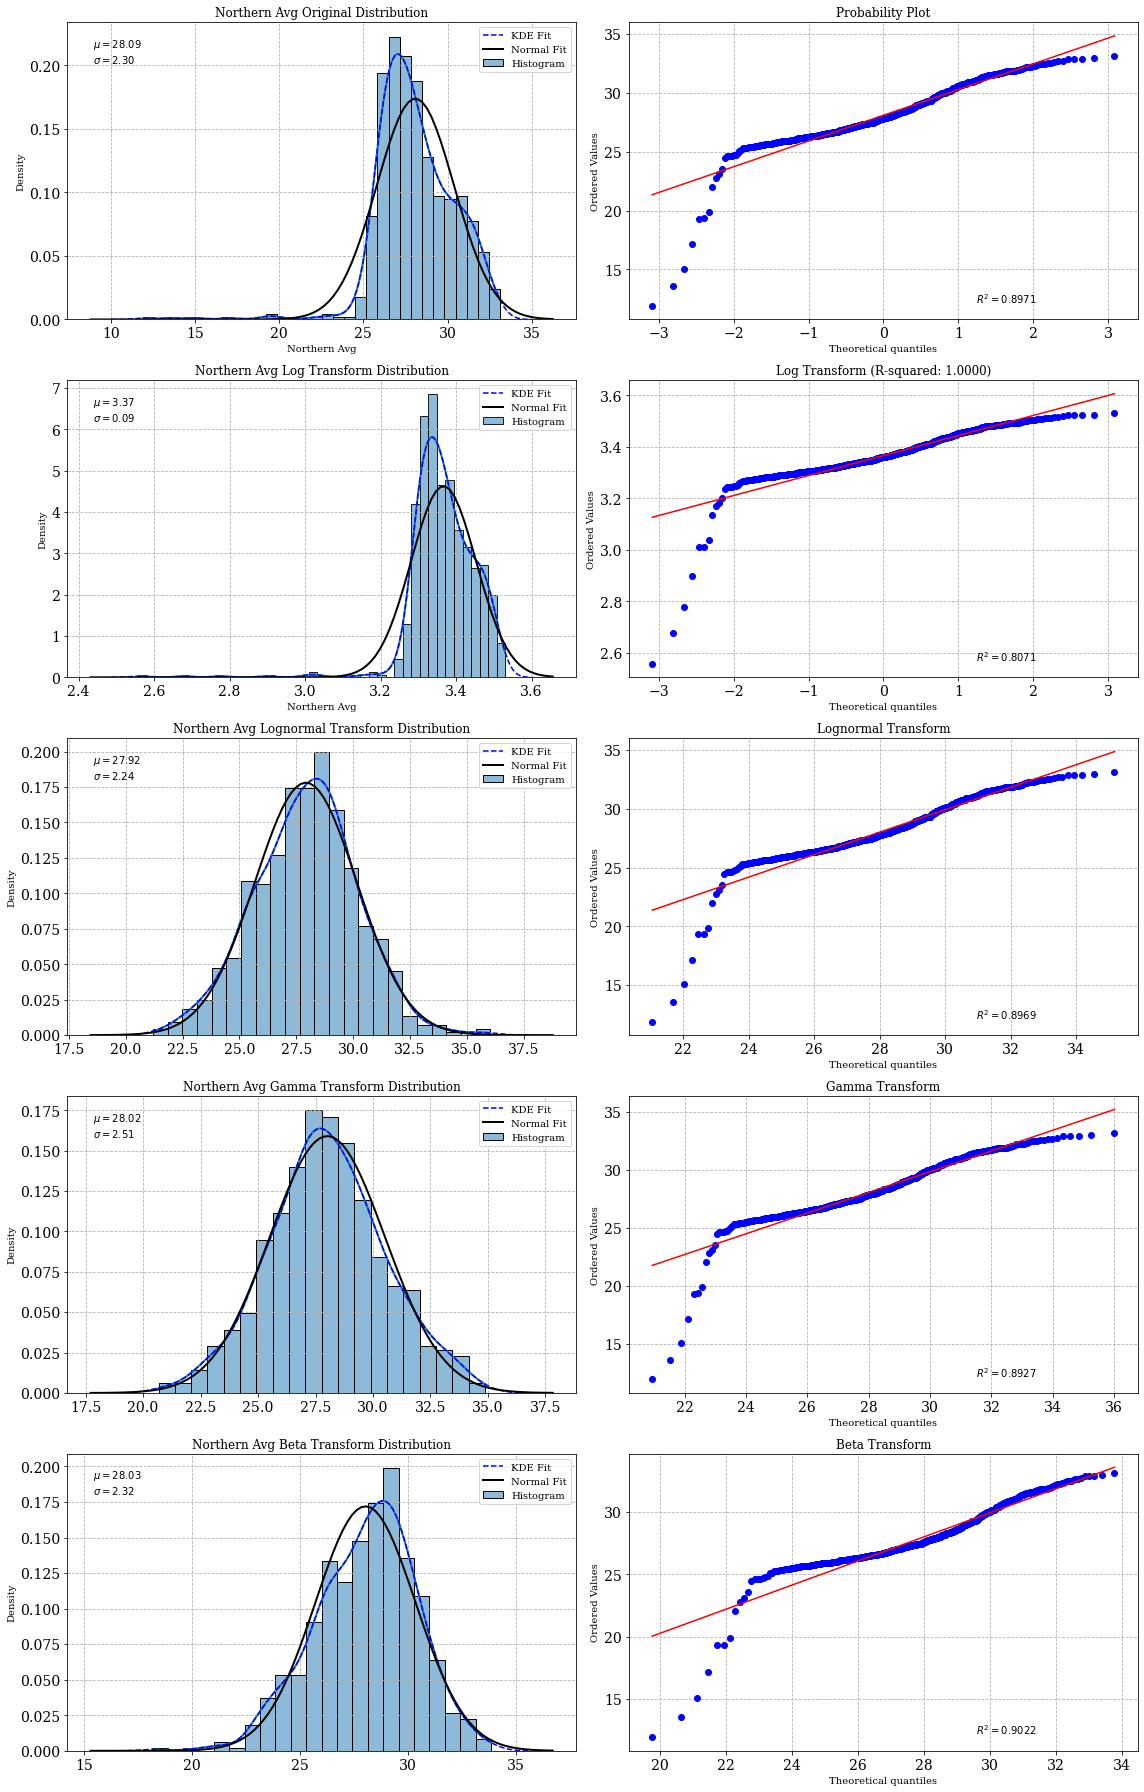

In [49]:
# Initialize NormalityChecker object with your DataFrame
checker = NormalityChecker(df_zones)

transformed_data = {}

# Check normality for a specific column
for ind in df_zones.columns:
    #       normality_checker.check_normality(f'{ind}', dir=output_dir)
    transformed_data[f'{ind}'] = checker.check_normality(f'{ind}', dir=output_dir)


In [51]:
transformed_data.keys()

dict_keys(['Coastal Avg', 'Middle Avg', 'Northern Avg'])

In [53]:
transformed_data['Coastal Avg'].keys()

dict_keys(['Log Transform', 'Lognormal Transform', 'Gamma Transform', 'Beta Transform'])

In [55]:
# transformed_data['Coastal Avg']['Beta Transform']

In [56]:
df_trans = pd.DataFrame()
df_trans['Coastal Avg'] = transformed_data['Coastal Avg']['Beta Transform']
df_trans['Middle Avg'] = transformed_data['Middle Avg']['Beta Transform']
df_trans['Northern Avg'] = transformed_data['Northern Avg']['Beta Transform']
df_trans.head()

Coastal Avg  Middle Avg  Northern Avg
0    29.406083   28.415397     33.840169
1    24.533366   22.886288     30.155734
2    27.240583   27.995254     31.392380
3    27.510188   27.718604     30.641486
4    26.321863   25.563546     26.416779

In [66]:
# << Import librairies >>
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import neural_network
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import QuantileTransformer

In [67]:
# def data_preprocess(X,y):
#     '''Split data into train and test form'''

#     try:
#         X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)

#     except:
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



#     scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

#     # scaler.fit(X_train)

#     # Now apply the transformations to the data:
#     train_scaled = scaler.fit_transform(X_train)
#     test_scaled = scaler.transform(X_test)

#     return(train_scaled, test_scaled, y_train, y_test)

def data_preprocess(X, y):
    '''Split data into train and test form'''

    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)

    except:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    transformer = QuantileTransformer(n_quantiles=100, random_state=0)

    # Fit and transform on training data
    train_transformed = transformer.fit_transform(X_train)
    # Transform test data (never fit on test data)
    test_transformed = transformer.transform(X_test)

    return train_transformed, test_transformed, y_train, y_test

X = df_ind_select
y = df_trans.values
X_train, X_test, y_train, y_test = data_preprocess(X,y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((478, 3), (206, 3), (478, 3), (206, 3))

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

# Define function to get base models
def get_basemodels():
    return {
        'lasso': Lasso(alpha=0.0001),
        'elastic_net': ElasticNet(alpha=0.0001, l1_ratio=0.7),
        'kernel_ridge': KernelRidge(alpha=0.1, coef0=1.0),
        'mlp': MLPRegressor(hidden_layer_sizes=(50,), activation='relu'),
        'xgboost': XGBRegressor(n_estimators=100, learning_rate=0.01),
        'knn': KNeighborsRegressor(n_neighbors=3),
        'linear_regression': LinearRegression(),
        'random_forest': RandomForestRegressor(n_estimators=100, max_depth=None),
        'svm': SVR(C=1, gamma='auto')
    }

# Define function to calculate RMSE for multi-output
def multioutput_rmse(y_true, y_pred):
    return 1e-1*np.sqrt(np.mean((abs(y_true) - abs(y_pred))**2, axis=0))

# Perform hyperparameter tuning for each base model
models_scores = []
param_grids = {
    'lasso': {'alpha': [0.0001, 0.001, 0.01]},
    'elastic_net': {'alpha': [0.0001, 0.001, 0.01], 'l1_ratio': [0.3, 0.5, 0.7]},
    'kernel_ridge': {'alpha': [0.1, 1.0, 10.0], 'coef0': [0.5, 1.0, 2.0]},
    'mlp': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh']},
    'xgboost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]},
    'knn': {'n_neighbors': [3, 5, 7]},
    'linear_regression': {},
    'random_forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
    'svm': {'C': [0.1, 1, 10], 'gamma': ['auto', 'scale']}
}
n_folds = 10
n_jobs = -1

for bs in ['lasso', 'elastic_net', 'kernel_ridge', 'mlp', 'xgboost', 'knn', 'linear_regression', 'random_forest', 'svm']:
    est = get_basemodels()[bs]
    param_grid = param_grids[bs]
    grid_search = GridSearchCV(estimator=est, param_grid=param_grid, scoring='neg_mean_squared_error', cv=n_folds, n_jobs=n_jobs, verbose=1)
    
    # Fit the grid search to each output separately
    scores_per_output = []
    for c in range(y_train.shape[-1]):
        grid_search.fit(X_train, y_train[:, c])
        print("Best parameters for {} output {}: {}".format(bs, c, grid_search.best_params_))

        # Get the best estimator and calculate scores
        best_est = grid_search.best_estimator_
        y_pred = best_est.predict(X_test)
        score = multioutput_rmse(y_test[:, c], y_pred)
        scores_per_output.append(score)
    
    models_scores.append([bs, scores_per_output])

# Bagging Regressor
bagging_models_scores = []
for model_score in models_scores:
    base_model = model_score[0]
    scores = model_score[1]
    best_params = GridSearchCV(get_basemodels()[base_model], param_grids[base_model], scoring='neg_mean_squared_error', cv=n_folds, n_jobs=n_jobs, verbose=1).fit(X_train, y_train[:, c]).best_params_
    base_model_instance = get_basemodels()[base_model].set_params(**best_params)
    bagging = BaggingRegressor(base_estimator=base_model_instance, n_estimators=10, random_state=0)
    
    # Fit the bagging regressor to each output separately
    y_pred_bagging = []
    for c in range(y_train.shape[-1]):
        bagging.fit(X_train, y_train[:, c])
        y_pred_bagging.append(bagging.predict(X_test))
    
    score_bagging = multioutput_rmse(y_test, np.array(y_pred_bagging).T)
    bagging_models_scores.append([f'{base_model}_bagging', score_bagging])

# Stacking Regressor
stacking_models_scores = []
estimators = [(f'{base_model}', get_basemodels()[base_model]) for base_model in ['lasso', 'elastic_net', 'kernel_ridge', 'mlp', 'xgboost', 'knn']]
for c in range(y_train.shape[-1]):
    stacking_estimators = [(name, GridSearchCV(est, param_grids[name], scoring='neg_mean_squared_error', cv=n_folds, n_jobs=n_jobs, verbose=1).fit(X_train, y_train[:, c]).best_estimator_) for name, est in estimators]
    stacking = StackingRegressor(estimators=stacking_estimators, final_estimator=SVR())
    stacking.fit(X_train, y_train[:, c])
    y_pred_stacking = stacking.predict(X_test)
    score_stacking = multioutput_rmse(y_test[:, c], y_pred_stacking)
    stacking_models_scores.append(['stacking_output_' + str(c+1), score_stacking])

# Convert the scores to a DataFrame for ranking
results_df = pd.DataFrame(bagging_models_scores + stacking_models_scores, columns=['Model', 'RMSE'])
results_df.set_index('Model', inplace=True)

# Calculate average RMSE for each model
results_df['Average RMSE'] = [np.mean(scores) for scores in results_df['RMSE']]

# Create a dictionary to store RMSE values for each output
rmse_dict = {'Model': [], 'Output 1 RMSE': [], 'Output 2 RMSE': [], 'Output 3 RMSE': []}

# Fill the dictionary with RMSE values for base models
for model_score in models_scores:
    model_name = model_score[0]
    scores = model_score[1]
    rmse_dict['Model'].append(model_name)
    for i, rmse in enumerate(scores):
        rmse_dict[f'Output {i+1} RMSE'].append(rmse)

# Add average RMSE for base models
average_rmse = np.mean([np.mean(scores) for _, scores in models_scores])
rmse_dict['Model'].append('Average')
rmse_dict['Output 1 RMSE'].append(average_rmse)
rmse_dict['Output 2 RMSE'].append(average_rmse)
rmse_dict['Output 3 RMSE'].append(average_rmse)

# Add bagging RMSE
bagging_rmse = results_df.loc['lasso_bagging']['RMSE']
bagging_rmse = np.concatenate((bagging_rmse, results_df.loc['elastic_net_bagging']['RMSE']))
bagging_rmse = np.concatenate((bagging_rmse, results_df.loc['kernel_ridge_bagging']['RMSE']))
bagging_rmse = np.concatenate((bagging_rmse, results_df.loc['mlp_bagging']['RMSE']))
bagging_rmse = np.concatenate((bagging_rmse, results_df.loc['xgboost_bagging']['RMSE']))
bagging_rmse = np.concatenate((bagging_rmse, results_df.loc['knn_bagging']['RMSE']))
bagging_rmse = np.concatenate((bagging_rmse, results_df.loc['linear_regression_bagging']['RMSE']))
bagging_rmse = np.concatenate((bagging_rmse, results_df.loc['random_forest_bagging']['RMSE']))
bagging_rmse = np.concatenate((bagging_rmse, results_df.loc['svm_bagging']['RMSE']))
rmse_dict['Model'].append('bagging')
rmse_dict['Output 1 RMSE'].append(bagging_rmse[0])
rmse_dict['Output 2 RMSE'].append(bagging_rmse[1])
rmse_dict['Output 3 RMSE'].append(bagging_rmse[2])

# Add stacking RMSE
stacking_rmse = []
stacking_rmse.append(results_df.loc['stacking_output_1']['RMSE'])
stacking_rmse.append(results_df.loc['stacking_output_2']['RMSE'])
stacking_rmse.append(results_df.loc['stacking_output_3']['RMSE'])
rmse_dict['Model'].append('stacking')
rmse_dict['Output 1 RMSE'].append(stacking_rmse[0])
rmse_dict['Output 2 RMSE'].append(stacking_rmse[1])
rmse_dict['Output 3 RMSE'].append(stacking_rmse[2])

# Create a DataFrame from the dictionary
rmse_df = pd.DataFrame(rmse_dict)

# Print the DataFrame
rmse_df


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best parameters for lasso output 0: {'alpha': 0.0001}
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best parameters for lasso output 1: {'alpha': 0.01}
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best parameters for lasso output 2: {'alpha': 0.01}
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters for elastic_net output 0: {'alpha': 0.01, 'l1_ratio': 0.5}
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters for elastic_net output 1: {'alpha': 0.01, 'l1_ratio': 0.5}
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters for elastic_net output 2: {'alpha': 0.01, 'l1_ratio': 0.3}
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters for kernel_ridge output 0: {'alpha': 1.0, 'coef0': 0.5}
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters for kernel_ridge output 1: {'alpha': 1.0,

/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for mlp output 0: {'activation': 'relu', 'hidden_layer_sizes': (50, 50)}
Fitting 10 folds for each of 6 candidates, totalling 60 fits


/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for mlp output 1: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50)}
Fitting 10 folds for each of 6 candidates, totalling 60 fits


/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for mlp output 2: {'activation': 'relu', 'hidden_layer_sizes': (50, 50)}
Fitting 10 folds for each of 9 candidates, totalling 90 fits


/Users/admin/env/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Best parameters for xgboost output 0: {'learning_rate': 0.1, 'n_estimators': 50}
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters for xgboost output 1: {'learning_rate': 0.1, 'n_estimators': 50}
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters for xgboost output 2: {'learning_rate': 0.1, 'n_estimators': 50}
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best parameters for knn output 0: {'n_neighbors': 7}
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best parameters for knn output 1: {'n_neighbors': 7}
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best parameters for knn output 2: {'n_neighbors': 7}
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters for linear_regression output 0: {}
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters for linear_regression output 1: {}
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best par

/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_netw

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/Users/admin/env/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 10 folds for each of 9 candidates, totalling 90 fits


/Users/admin/env/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_netw

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 10 folds for each of 9 candidates, totalling 90 fits


/Users/admin/env/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_netw

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 10 folds for each of 9 candidates, totalling 90 fits


/Users/admin/env/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_netw

Model  Output 1 RMSE  Output 2 RMSE  Output 3 RMSE
0               lasso       0.145993       0.162768       0.220381
1         elastic_net       0.145801       0.162985       0.220287
2        kernel_ridge       1.009551       1.025717       1.070028
3                 mlp       0.149125       0.172658       0.220404
4             xgboost       0.152719       0.180572       0.237148
5                 knn       0.153484       0.177339       0.236352
6   linear_regression       0.146000       0.164077       0.220723
7       random_forest       0.152614       0.180225       0.234525
8                 svm       0.149123       0.162063       0.219041
9             Average       0.276730       0.276730       0.276730
10            bagging       0.145988       0.162225       0.220296
11           stacking       0.147571       0.160245       0.220673

In [63]:
# from yellowbrick.regressor import PredictionError
# import matplotlib.pyplot as plt

# # Define the number of outputs and the number of models
# num_outputs = 3
# num_models = 9

# # Iterate over each output
# for c in range(y_train.shape[-1]):
#     # Create a figure with 3 by 4 subplots for each output
#     fig, axes = plt.subplots(3, 4, num=c + 1, figsize=(20, 15))

#     # Extracted model names and stacked model
#     model_names = ['lasso', 'elastic_net', 'kernel_ridge', 'mlp', 'xgboost', 'knn', 'linear_regression', 'random_forest', 'svm']
#     stacked_model = StackingRegressor(estimators=[(name, get_basemodels()[name]) for name in model_names], final_estimator=Lasso())

#     # Iterate over each subplot within the output set
#     for i, ax in enumerate(axes.flat):
#         if i < num_models:
#             estimator = get_basemodels()[model_names[i]]
#             title = model_names[i].replace("_", " ").title()
#         elif i == num_models:
#             estimator = StackingAveragedModels(base_models=[get_basemodels()[name] for name in model_names], meta_model=get_basemodels()['lasso'], param_grid={})
#             title = "Averaged"
#         elif i == num_models + 1:
#             estimator = BaggingRegressor(base_estimator=get_basemodels()['lasso'], n_estimators=10, random_state=0)
#             title = "Bagging"
#         else:
#             estimator = stacked_model
#             title = "Stacking"

#         viz = PredictionError(estimator, ax=ax, s='bubble_size')
#         viz.fit(X_train, y_train[:, c])  # Use the specific output for training
#         viz.score(X_test, y_test[:, c], train=False)  # Use the specific output for testing
#         ax.set_title(title, fontsize=16)

#         for label in ax.texts:
#             label.set_size(12)

#         viz.finalize()

#     # Adjust layout
#     fig.tight_layout()

# # Show all figures
# plt.show()

/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multi

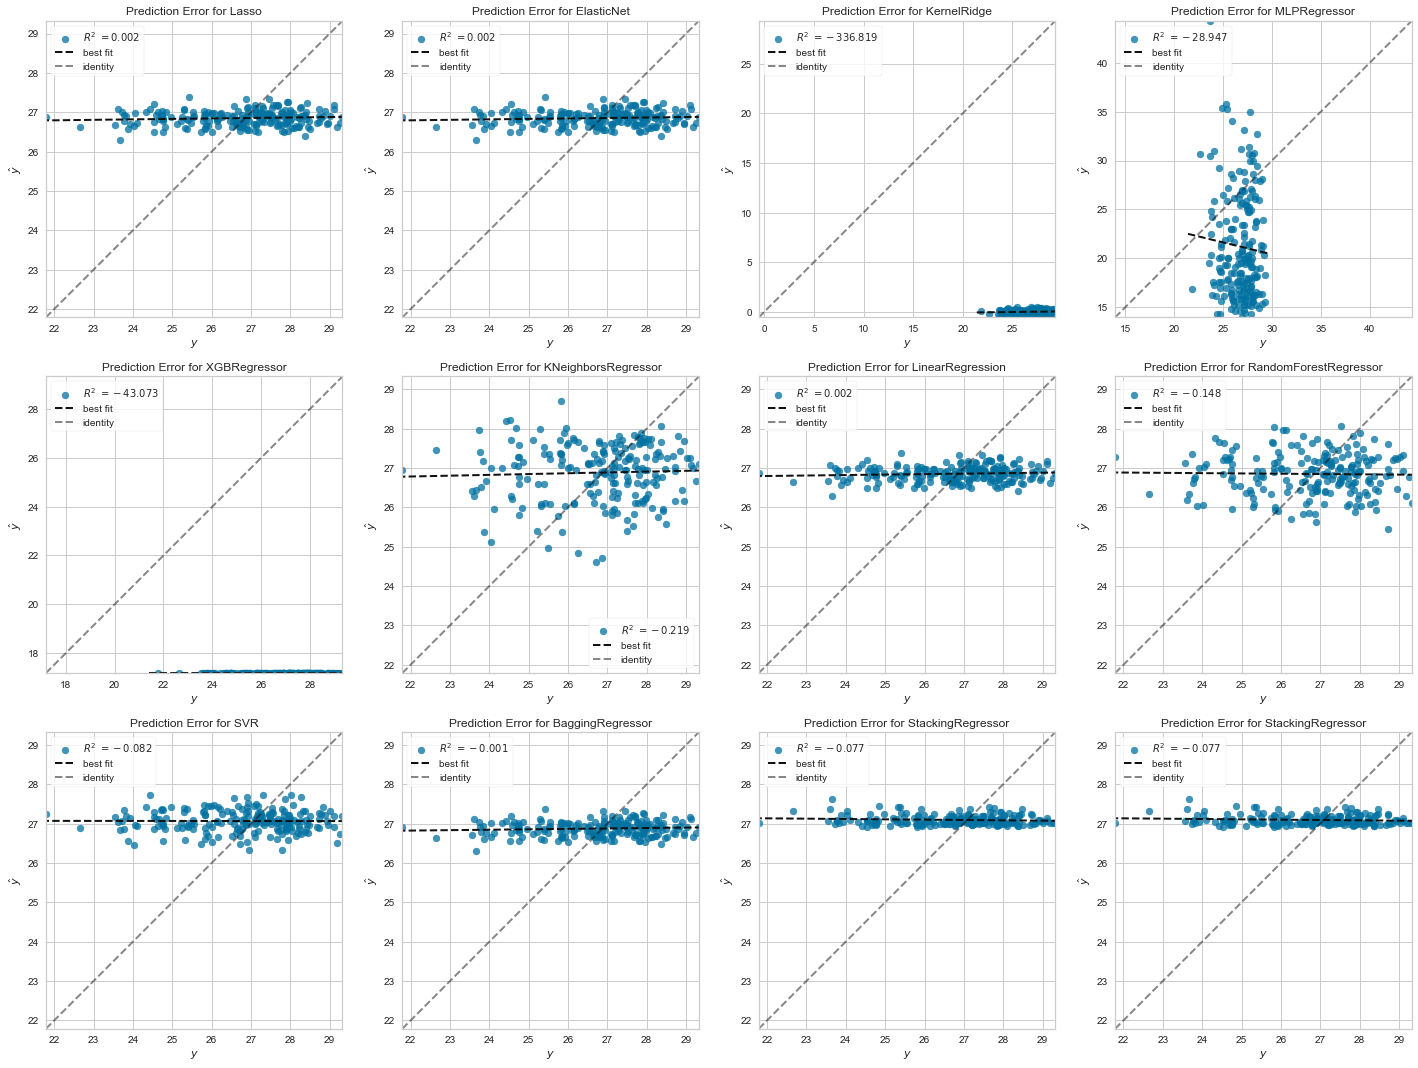

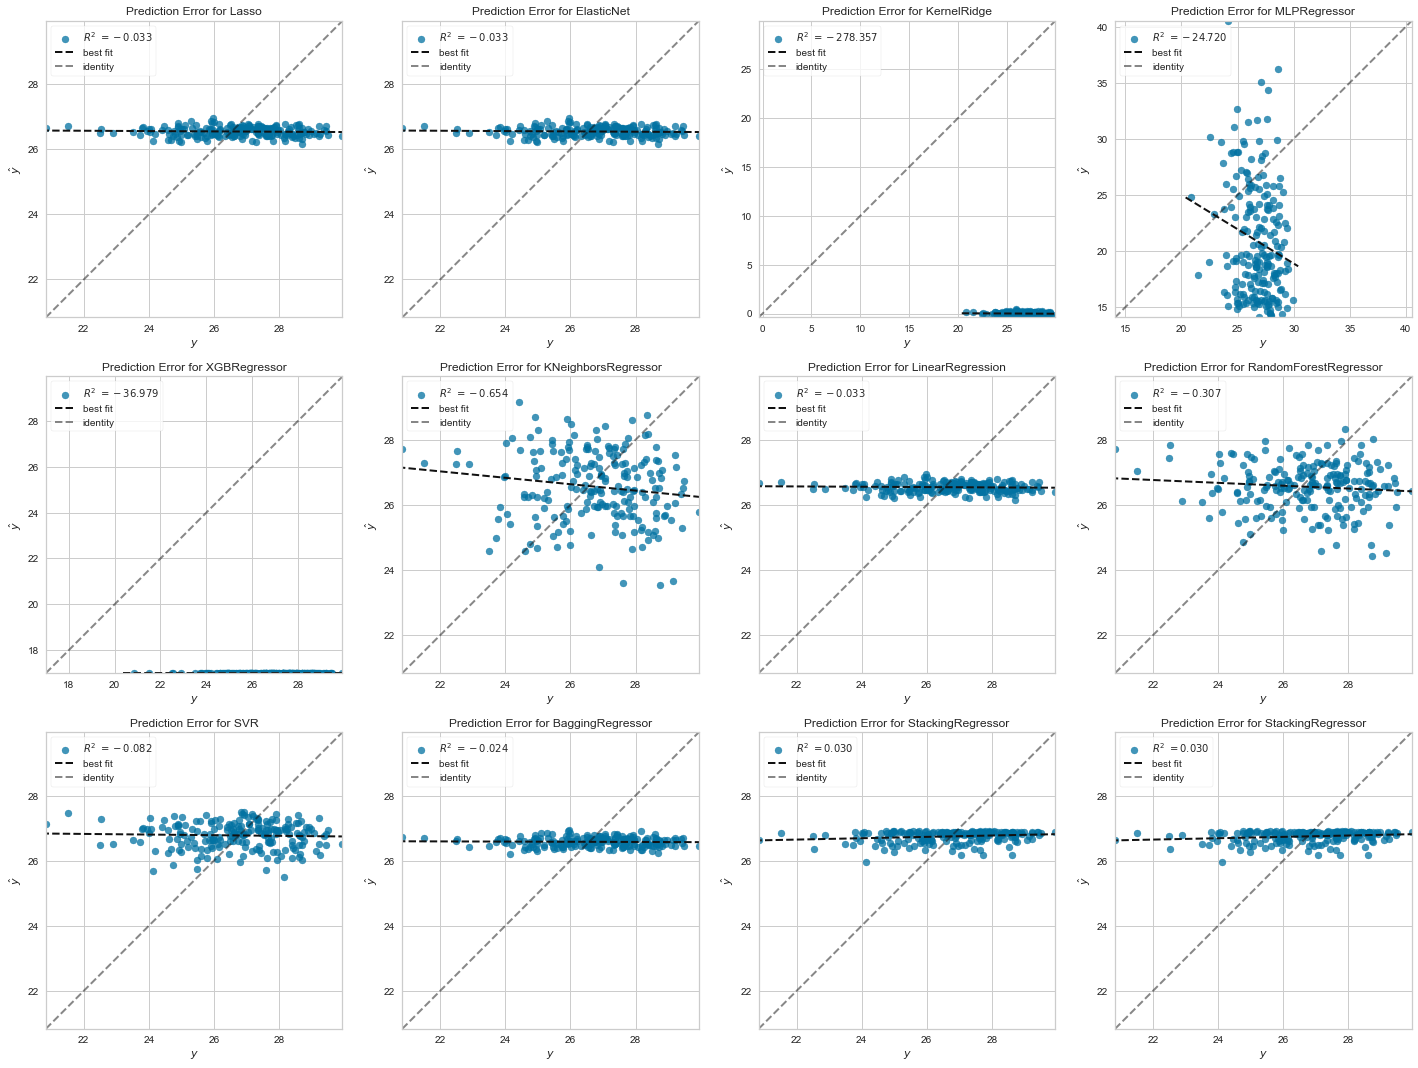

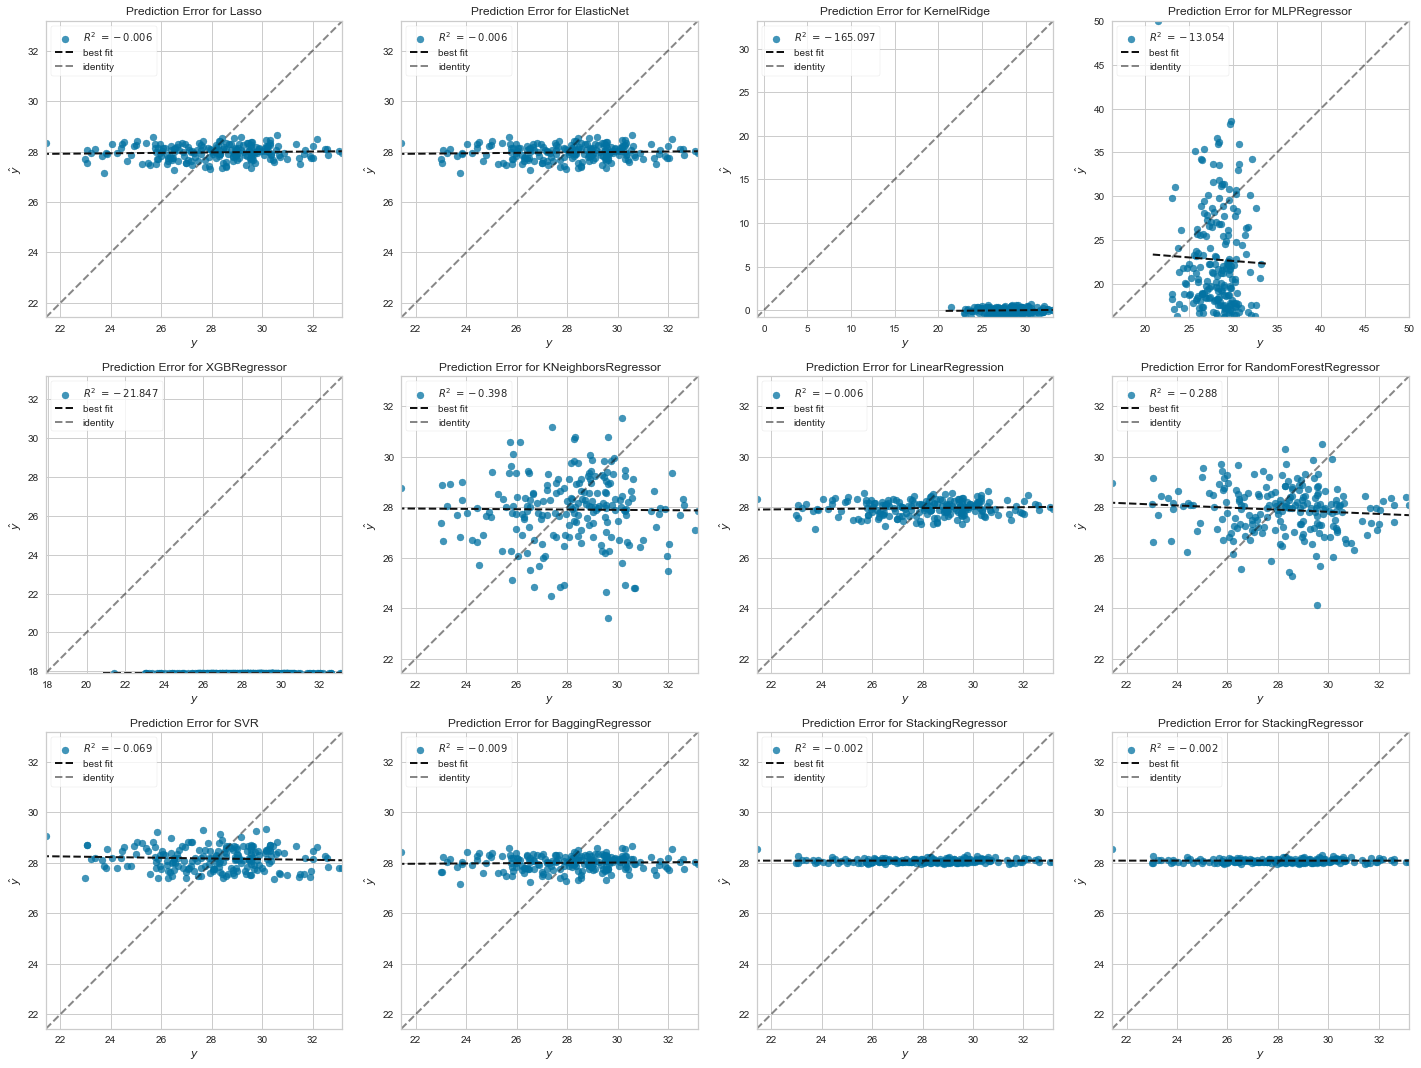

In [62]:
from yellowbrick.regressor import PredictionError
import matplotlib.pyplot as plt

# Define the number of outputs and the number of models
num_outputs = 3
num_models = 9

# Iterate over each output
for c in range(y_train.shape[-1]):
    # Create a figure with 3 by 4 subplots for each output
    fig, axes = plt.subplots(3, 4, num=c + 1, figsize=(20, 15))

    # Extracted model names and stacked model
    model_names = ['lasso', 'elastic_net', 'kernel_ridge', 'mlp', 'xgboost', 'knn', 'linear_regression', 'random_forest', 'svm']
    stacked_model = StackingRegressor(estimators=[(name, get_basemodels()[name]) for name in model_names], final_estimator=SVR())

    # Iterate over each subplot within the output set
    for i, ax in enumerate(axes.flat):
        if i < num_models:
            estimator = get_basemodels()[model_names[i]]
            title = model_names[i].replace("_", " ").title()
        elif i == num_models:
            estimator = BaggingRegressor(base_estimator=get_basemodels()['lasso'], n_estimators=10, random_state=0)
            title = "Bagging"
        else:
            estimator = stacked_model
            title = "Stacking"

        viz = PredictionError(estimator, ax=ax, s='bubble_size')
        viz.fit(X_train, y_train[:, c])  # Use the specific output for training
        viz.score(X_test, y_test[:, c], train=False)  # Use the specific output for testing
        ax.set_title(title, fontsize=16)

        for label in ax.texts:
            label.set_size(12)

        viz.finalize()

    # Adjust layout
    fig.tight_layout()

# Show all figures
plt.show()


/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/admin/env/lib/python3.8/site-packages/sklearn/neural_network/_multi

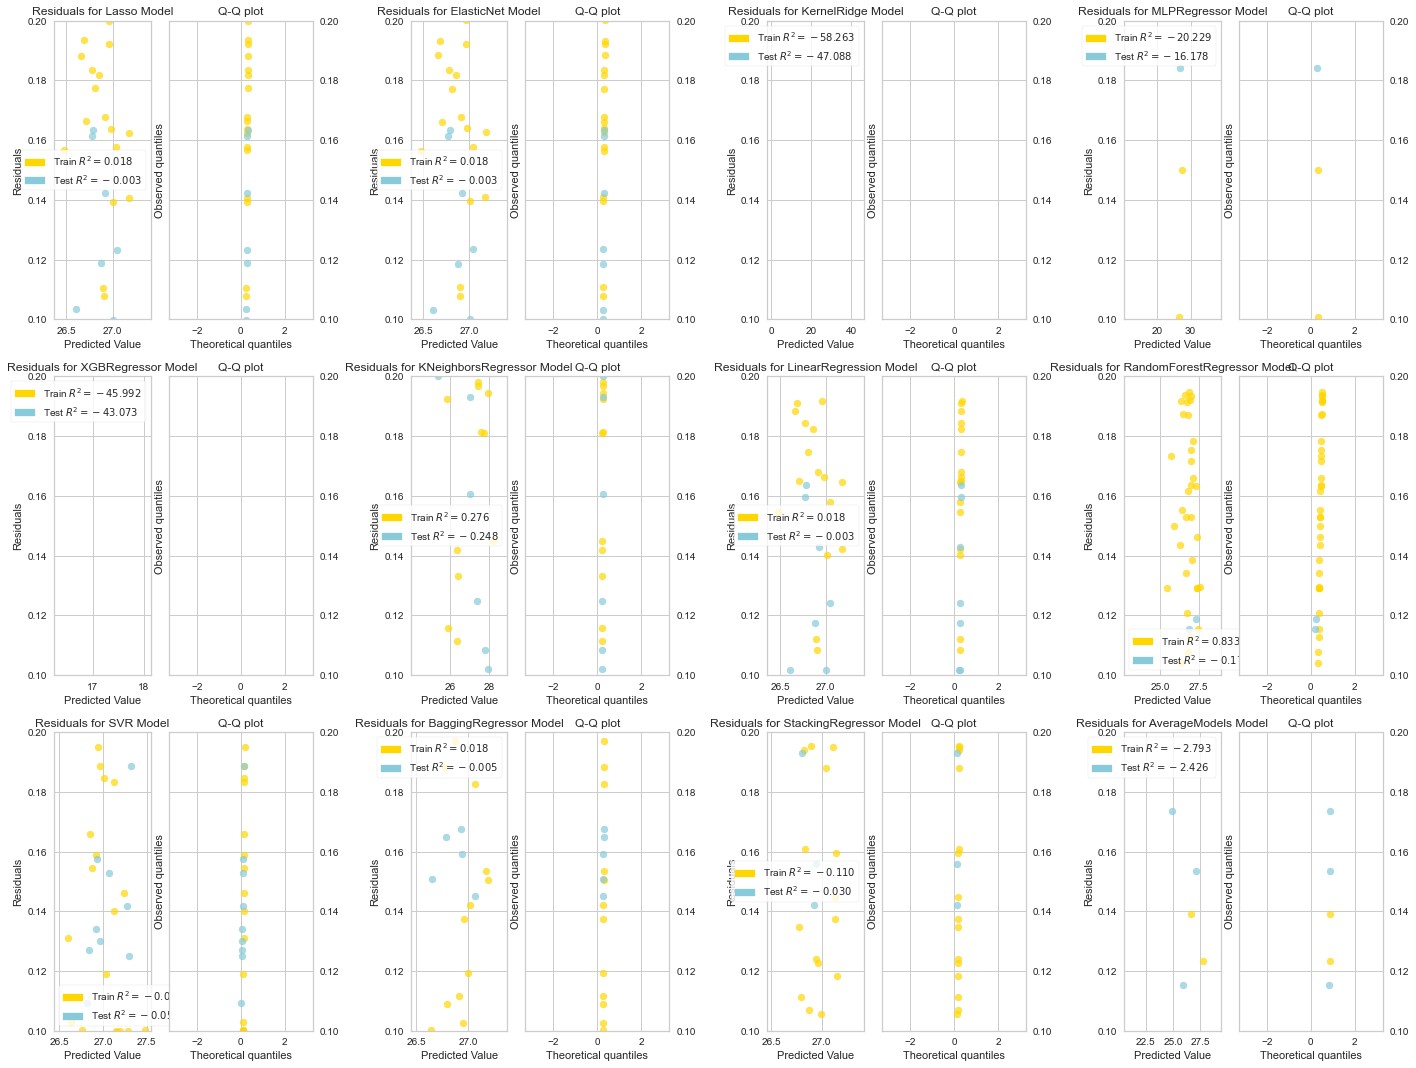

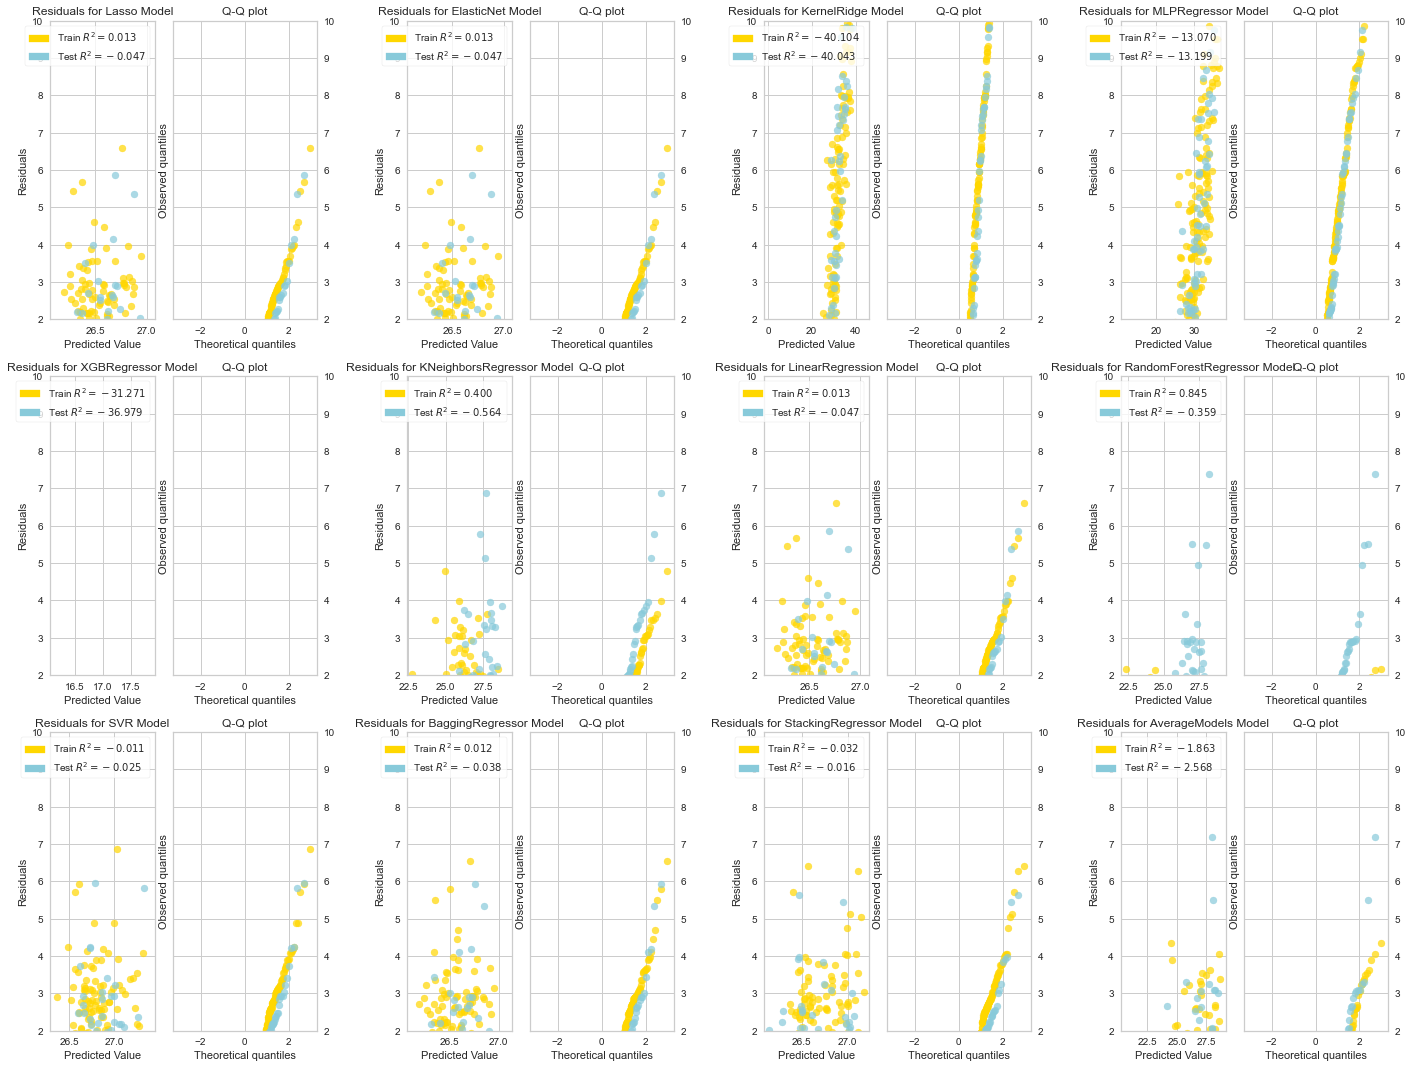

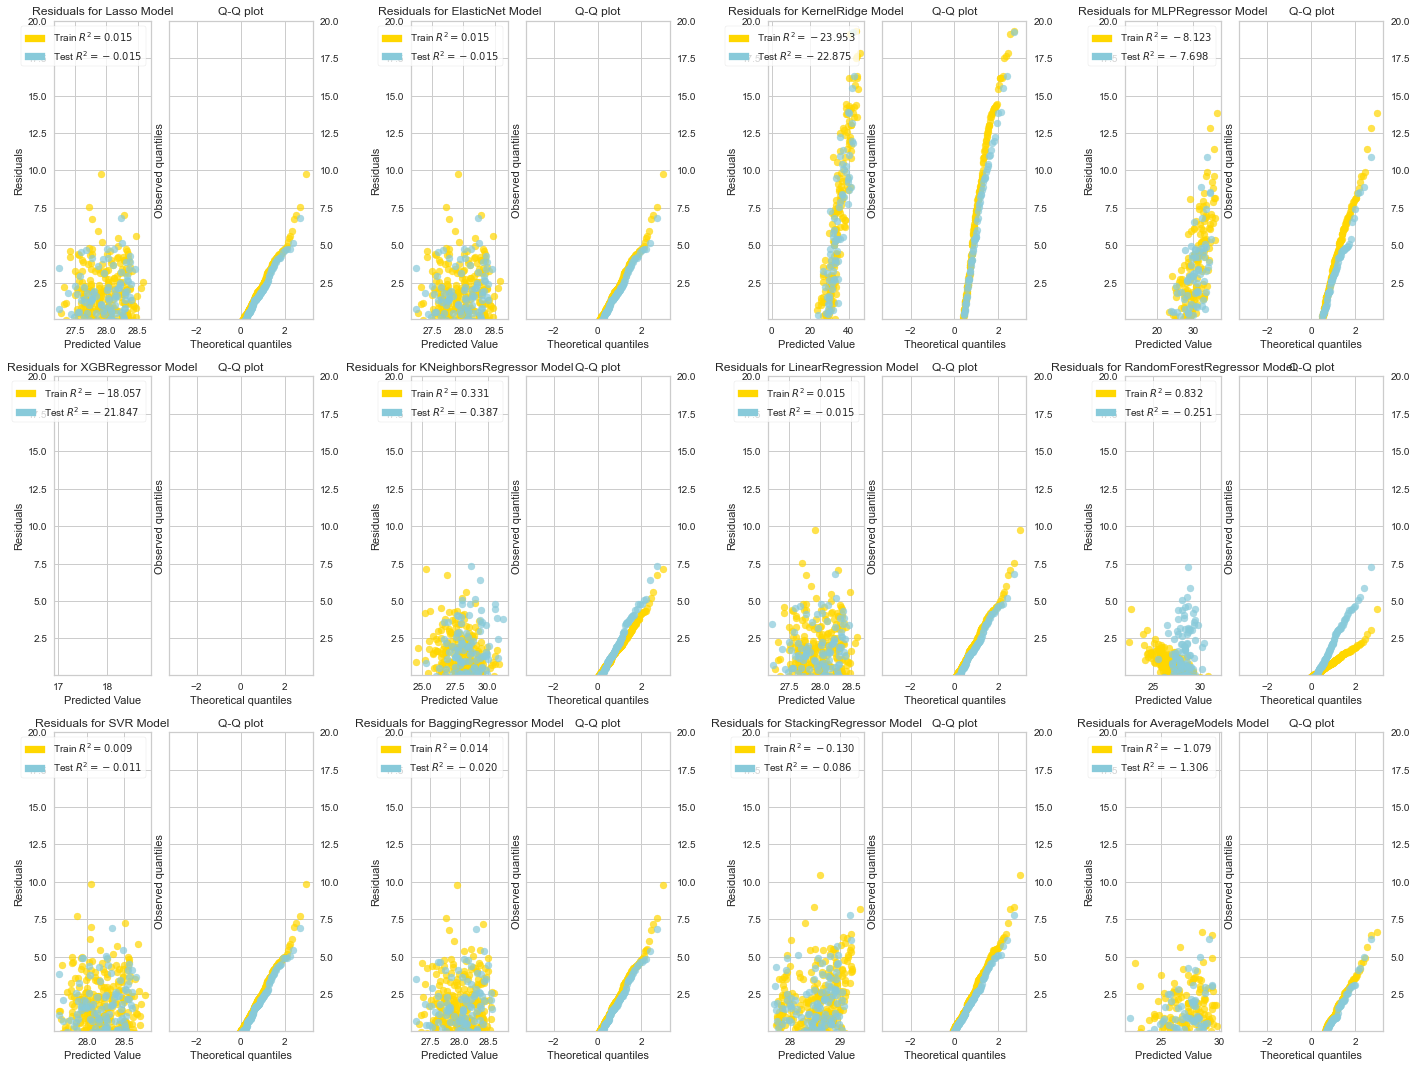

In [71]:
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt
import numpy as np

from sklearn.base import RegressorMixin, BaseEstimator

class AverageModels(BaseEstimator, RegressorMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=1)


# Define the number of outputs and the number of models
num_outputs = 3
num_models = 9

# Define the lower and upper limits for the y-axis adjustment
d = np.array([0.1, 2, 0.05])  # Lower limits
u = np.array([0.2, 10, 20])  # Upper limits

# Iterate over each output
for c in range(y_train.shape[-1]):
    # Create a figure with 3 by 4 subplots for each output
    fig, axes = plt.subplots(3, 4, num=c + 1, figsize=(20, 15))

    # Extracted model names and stacked model
    model_names = ['lasso', 'elastic_net', 'kernel_ridge', 'mlp', 'xgboost', 'knn', 'linear_regression', 'random_forest', 'svm']
    stacked_model = StackingRegressor(estimators=[(name, get_basemodels()[name]) for name in model_names], final_estimator=SVR())

    # Iterate over each subplot within the output set
    for i, ax in enumerate(axes.flat):
        if i < num_models:
            estimator = get_basemodels()[model_names[i]]
            title = model_names[i].replace("_", " ").title()
        elif i == num_models:
            estimator = BaggingRegressor(base_estimator=get_basemodels()['lasso'], n_estimators=10, random_state=0)
            title = "Bagging"
        elif i == num_models + 1:
            estimator = stacked_model
            title = "Stacking"
        else:
            # Compute average model
            avg_model = AverageModels(models=[get_basemodels()[name] for name in model_names])
            estimator = avg_model
            title = "Average"

        viz = ResidualsPlot(estimator, ax=ax, train_alpha=0.7, test_alpha=0.7, test_color='c', train_color='gold', hist=False, qqplot=True, train_score_=0.6)
        viz.fit(X_train, y_train[:, c])  # Use the specific output for training
        viz.score(X_test, y_test[:, c], train=False)  # Use the specific output for testing
        ax.set_title(title, fontsize=16)

        for label in ax.texts:
            label.set_size(12)

        # Adjust the y-axis limits
        viz.ax.set_ylim(bottom=d[c], top=u[c])  # Adjust the ylim

        viz.finalize()

    # Adjust layout
    fig.tight_layout()

# Show all figures
plt.show()
